# A quicknote before you start

In [ ]:
Quit often while experimenting your notebook can accumulate a tremedous amount of memory in cache files.
Sometime you just want to clear all variables to start over in any case the following couple of cells 
show you how to accomplish 'reset' 

In [90]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
# References
https://progzoo.net/wiki/Python:Filtering_an_Array
http://www.scipy-lectures.org/packages/scikit-image/  
http://effbot.org/imagingbook/image.htm    
    
a = np.array([[1, 2, 0, 0],

In [633]:
from PIL import Image
import random
data = [random.randint(0, 1) for i in range(612 * 612)]
img = Image.new('1', (612, 612))
img.putdata(data)
img.save('images/my.png')
img.show()



In [7]:
# To get image shape ( dimensions and channels )
import numpy as np
from scipy import ndimage
import cv2

im = cv2.imread('images/face.jpg')
im.shape

(825, 726, 3)

In [635]:
!ls

!!!A -Super-Good-mouse-sizing-and-cropping.ipynb
Creating-C++-Image-viewer.ipynb
creating-saving-using-npy_filters.ipynb
Filters_With_cv2.trackbars.ipynb
images
NewNotebook1.ipynb
numpy-filters
README.md
save-image-and-array-for-seamless-cloning.ipynb
showme
showme.cpp


In [13]:
# To get image shape ( dimensions and channels )
import numpy as np
from scipy import ndimage
import cv2

im = cv2.imread('images/face.jpg')
im.shape

(825, 726, 3)

In [632]:
from PIL import Image
imN = cv2.imread('images/face.jpg')

cv2.imwrite('images/face_numpy.jpg', imN)
cv2.imshow("imN", imN)
cv2.waitKey(0)
cv2.destroyAllWindows()

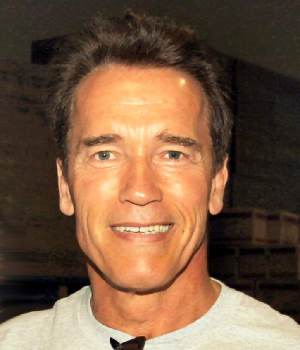

In [21]:
from PIL import Image
imP = Image.open('images/face.jpg')
n_imp = imP.resize((300, 350), Image.NEAREST)
n_imp.save('images/face_300.jpg')
n_imp

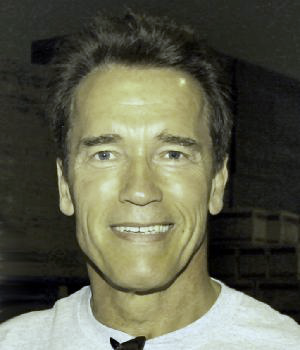

In [20]:
from PIL import Image
from StringIO import StringIO
imP = Image.open('images/face_300.jpg')
rgb2xyz = (
    0.412453, 0.357580, 0.180423, 0,
    0.212671, 0.715160, 0.072169, 0,
    0.019334, 0.119193, 0.950227, 0 )
out = imP.convert("RGB", rgb2xyz)

out

In [687]:
# Clipping a gray image
import numpy as np
from skimage.feature import greycomatrix
im = cv2.imread("images/face_300.jpg")
im2 = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
clipped = np.clip(im2, a_min=100, a_max=200)

cv2.imshow("clipped", clipped)
cv2.waitKey(0)
cv2.destroyAllWindows()

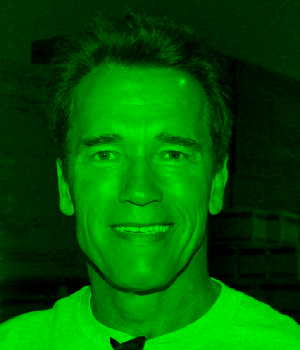

In [46]:
from PIL import Image
from StringIO import StringIO
imP = Image.open('images/face_300.jpg')
rgb2xyz = (
     0.0, 0.0, 0.0, 0,
     0.1, 0.8, 0.1, 0,
     0.0, 0.0, 0.0, 0 )
out = imP.convert("RGB", rgb2xyz)

out

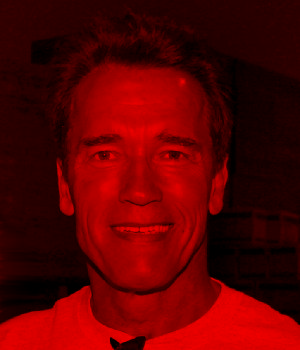

In [609]:
from PIL import Image
from StringIO import StringIO
imP = Image.open('images/face_300.jpg')
rgb2xyz = (
     0.1, 0.8, 0.1, 0,
     0.0, 0.0, 0.0, 0,
     0.0, 0.0, 0.0, 0 )
out = imP.convert("RGB", rgb2xyz)

out

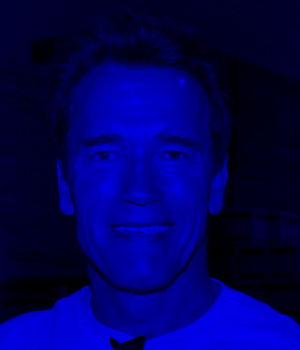

In [614]:
from PIL import Image
from StringIO import StringIO
imP = Image.open('images/face_300.jpg')
rgb2xyz = (
     0.0, 0.0, 0.0, 0,
     0.0, 0.0, 0.0, 0,
     0.1, 0.8, 0.1, 0 )
out = imP.convert("RGB", rgb2xyz)

out

In [729]:
# CONVERT rgb2lab
from PIL import Image
from skimage import color
import numpy as np

# Open the image file
src = Image.open("images/face_300.jpg")

# Attempt to ensure image is RGB
src = src.convert(mode="RGB")

# Create array of image using numpy
srcArray = np.asarray(src)

# Convert array from RGB into Lab
srcArray = color.rgb2lab(srcArray)

# Save
cv2.imwrite("images/test_out.jpg", srcArray)



True

In [728]:
!showme images/test_out.jpg

!wget -O images/mars.jpg https://www.nasa.gov/sites/default/files/thumbnails/image/arsiamonscroppedpia00177.jpg

!wget -O images/oldimage.jpg http://old.mfb-geo.com/pic/pic_news/20071002_wv_Houston.jpg

# -----    SAVE EVERYTHING ABOVE HERE  ------

In [691]:
# Clipping a color image
import numpy as np
from skimage.feature import greycomatrix
import cv2

im = cv2.imread("images/face_300.jpg")
#im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
clipped = np.clip(im, a_min=80, a_max=250)
cv2.imshow("clipped", clipped)
cv2.waitKey(0)
cv2.destroyAllWindows()

('Filtered to: ', array([[[ 255.,  255.,    0.]]]))


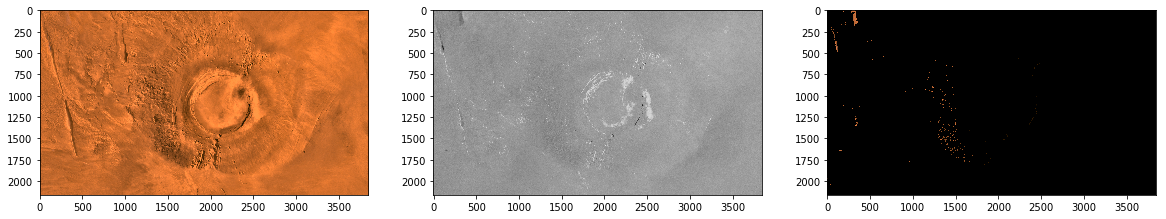

('Filtered to: ', array([[[ 255.,  190.,  200.]]]))


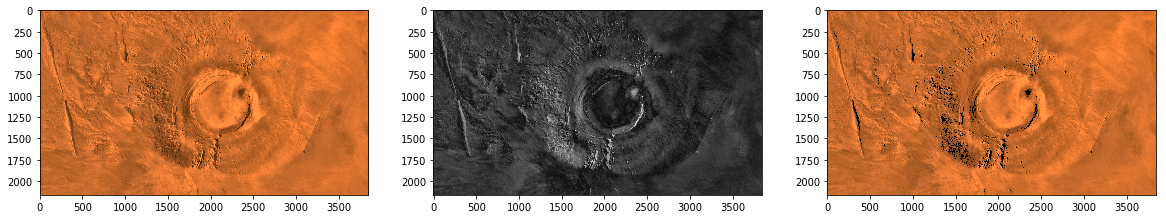

('Filtered to: ', array([[[ 255.,  165.,    0.]]]))


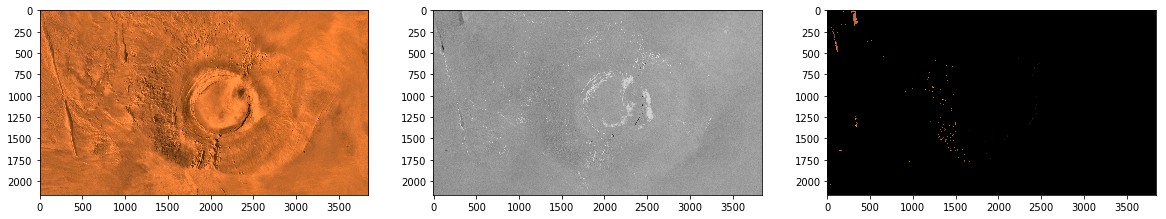

('Filtered to: ', array([[[ 255.,    0.,    0.]]]))


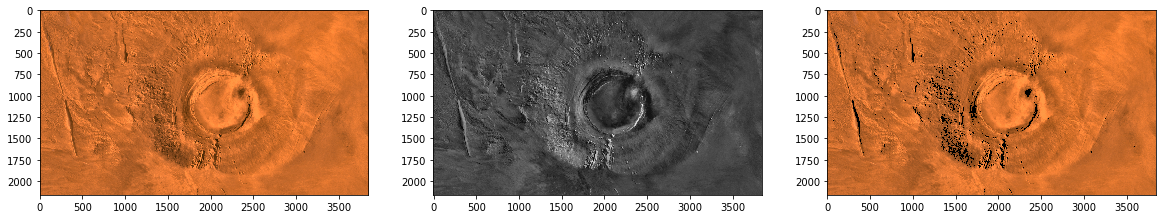

In [9]:
from skimage import io, img_as_float, color, exposure
import numpy as np
import matplotlib.pyplot as plt
img = img_as_float(io.imread('images/mars.jpg'))

# Isolate paint marks

# Put image into LAB colour space
image_lab = color.rgb2lab(img)
img = exposure.rescale_intensity(img)

# Colours of interest
color_array = np.array([
        [[[255, 255, 0.]]],    # Yellow stuff
        [[[255, 190, 200.]]],    # Pink stuff   
        [[[255, 165, 0.]]],    # Orange stuff
        [[[255, 0, 0.]]],    # Red stuff        
        ])

# Loop through the color array and pick out the colored features
for i in range(0,color_array.ndim):
    # Compute distance between the color of interest and the actual image
    # http://scikit-image.org/docs/dev/api/skimage.color.html#skimage.color.deltaE_cmc
    # "The usual values are kL=2, kC=1 for “acceptability”"
    distance_color = color.deltaE_ciede2000(color_array[i], image_lab, kL=2, kC=1, kH=0.5)    

    # Normalise distance
    distance_color = exposure.rescale_intensity(distance_color)

    # Mask image
    image_filtered = img.copy()
    image_filtered[distance_color > 0.5] = 0

    # Plot it up
    print ("Filtered to: ", color_array[i])
    f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(20, 10))
    ax0.imshow(img)
    ax1.imshow(distance_color, cmap='gray')
    ax2.imshow(image_filtered)
    plt.show()

In [93]:
from skimage import color
from skimage.morphology import disk, opening, dilation
from numpy import square
import cv2
img = cv2.imread("images/mars.jpg")

img_hsv = color.rgb2hsv(img) # Image into HSV colorspace
h = img_hsv[:,:,0] # Hue
s = img_hsv[:,:,1] # Saturation
v = img_hsv[:,:,2] # Value aka Lightness

plt.figure(1, figsize=(15, 15))

plt.subplot(4,2,1); plt.imshow(h, cmap='gray'); plt.title('Hue')
plt.subplot(4,2,2); plt.imshow(s, cmap='gray'); plt.title('Saturation')
plt.subplot(4,2,3); plt.imshow(v, cmap='gray'); plt.title('Value')
plt.tight_layout()

mask = (s > 0.35).astype(np.uint8);  # Thresholding in the Saturation-channel
plt.subplot(4,2,4); plt.imshow(mask); plt.title('mask')

#disk_elem = disk(1) # Remove small regions
#opened = opening(mask, selem=disk_elem)
#plt.subplot(4,2,5); plt.imshow(opened); plt.title('Opened mask')

#square_elem = square(2) # rejoin colored features
#dilated = dilation(opened, selem=square_elem)
#plt.subplot(4,2,6); plt.imshow(dilated); plt.title('Opened mask')

img2 = img.copy()
#img2[dilated.astype(bool), :] = 0; # Set the pixels to zero, where 
plt.subplot(4,2,7); plt.imshow(img2); plt.title('Final Image') 


TypeError: 'module' object is not callable

In [14]:
from numpy import square

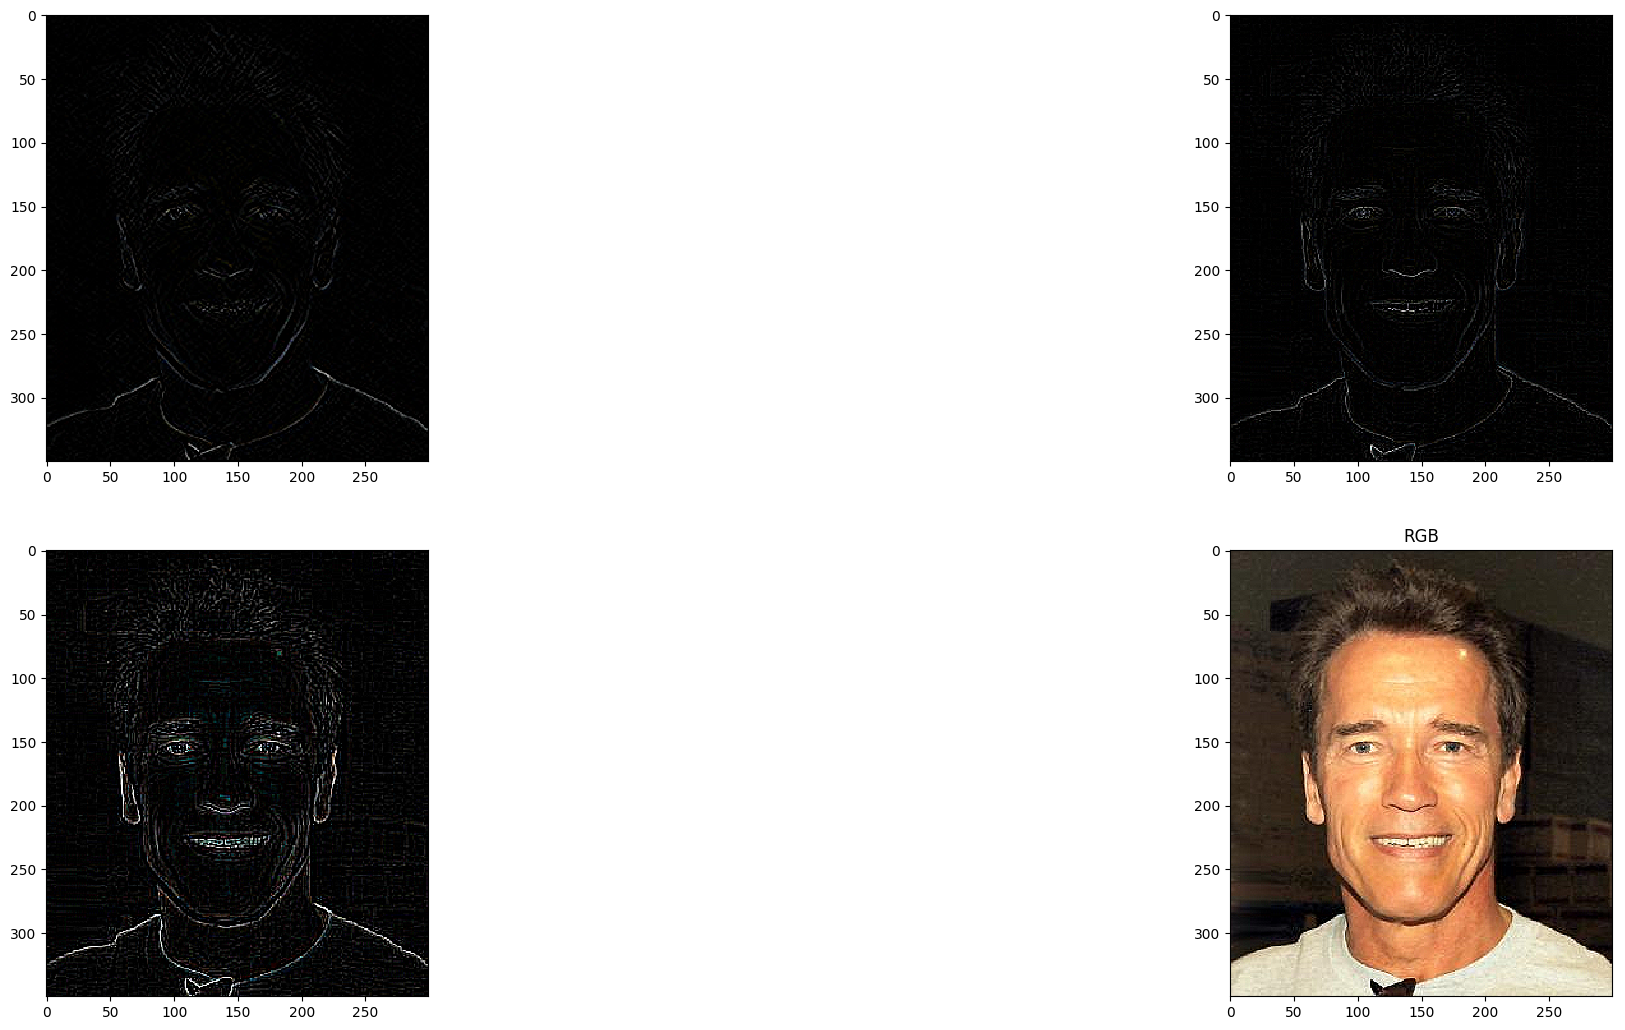

In [112]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import scipy.ndimage.filters as filter
import cv2

kernel_edge_detect1 = np.array([[1.,0.,-1.],
                                [0.,0.,0.],
                                [-1.,0.,1.]])

kernel_edge_detect2 = np.array([[0.,1.,0.],
                                [1.,-4.,1.],
                                [0.,1.,0.]])

kernel_edge_detect3 = np.array([[-1.,-1.,-1.],
                                [-1.,8.,-1.],
                                [-1.,-1.,-1.]])

kernel_sharpen = np.array([[0.,-1.,0.],
                           [-1.,5.,-1.],
                           [0.,-1.,0.]])

kernel_sharpen2 = np.array([[-1.,-1.,-1.],
                           [-1.,9.,-1.],
                           [-1.,-1.,-1.]])

kernel_blur = np.array([[1.,1.,1.],
                        [1.,2.,1.],
                        [1.,1.,1.]])


kernel_sh = np.array([ [-1,0,2,0,-1],
                    [-1,0,2,0,-1],
                    [-1,0,2,0,-1],
                    [-1,0,2,0,-1],
                    [-1,0,2,0,-1] ],np.float32)

kernel_shr = np.load('numpy-filters/sharpen_filter.npy')


#image=mpimg.imread('images/face_300.jpg')[:,:,0]
image = cv2.imread('images/face_300.jpg')
fig = plt.figure(figsize=(28, 13), dpi=100)


image2 = cv2.filter2D(image, -1, kernel_edge_detect1)
newimage = cv2.filter2D(image, -1, kernel_edge_detect2)
flipped_kernel = cv2.filter2D(image, -1, kernel_edge_detect3)
poorimage = cv2.filter2D(image, -1, kernel_shr)
#plt.imshow(imGray, cmap="gray")



left  = None  # the left side of the subplots of the figure
right = None    # the right side of the subplots of the figure
bottom = None   # the bottom of the subplots of the figure
top = None      # the top of the subplots of the figure
wspace = None   # the amount of width reserved for blank space between subplots
hspace = None   # the amount of height reserved for white space between subplots
# These two can be called on 'fig' instead of 'plt' too
plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top,
                wspace=wspace, hspace=hspace)


plt.subplot(2, 2, 1, )
plt.imshow(image2,cmap = 'gray')
plt.subplot(2, 2, 2)
plt.imshow(newimage, cmap="gray")
plt.subplot(2, 2, 3)

flipped_kernel2 = cv2.cvtColor(flipped_kernel, cv2.COLOR_BGR2RGB)
plt.imshow(flipped_kernel2, cmap="gray")
plt.subplot(2, 2, 4)
plt.title("RGB")
poorimage2 = cv2.cvtColor(poorimage, cv2.COLOR_BGR2RGB)
plt.imshow(poorimage2, cmap="gray")

plt.show()




In [ ]:
Colormap RGB is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, 
    BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, 
    OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, 
    PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, 
    RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, 
    Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, 
    Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, 
    YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, 
    bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, 
    flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, 
    gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, 
    gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, 
    magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, 
    prism_r, rainbow, rainbow_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, 
    summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, 
    viridis, viridis_r, winter, winter_r

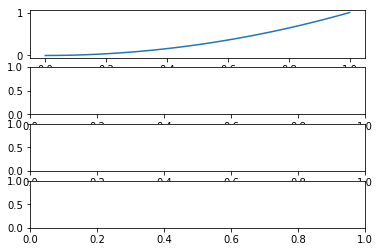

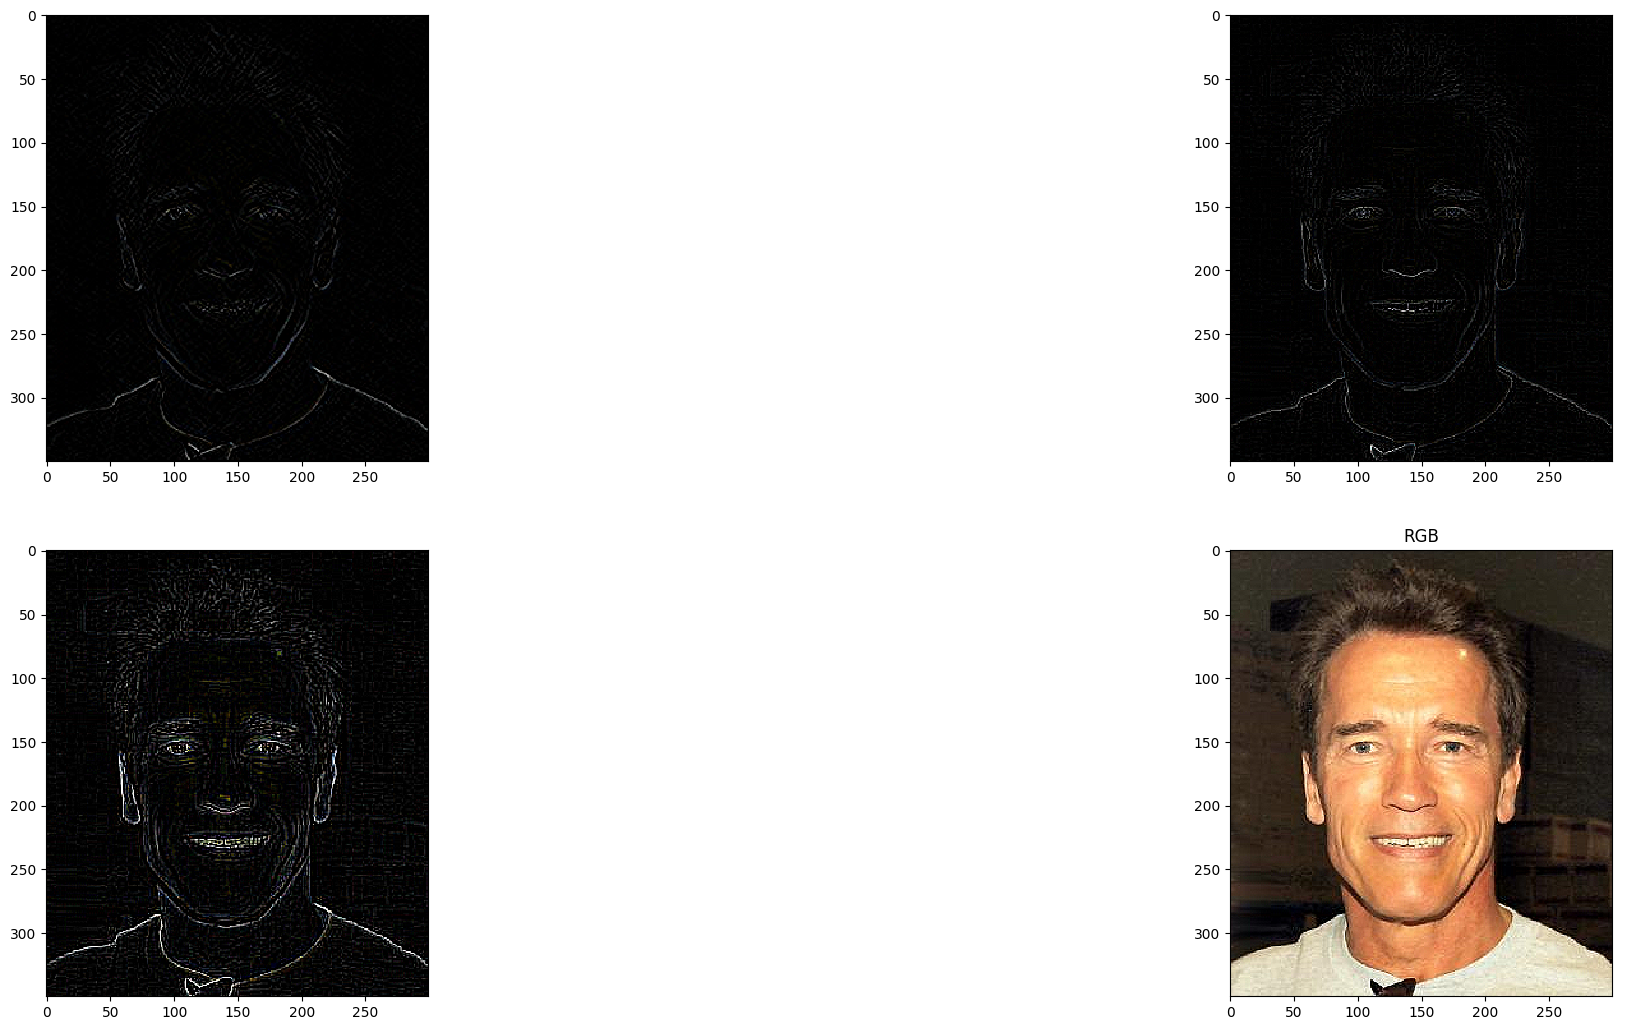

In [87]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import scipy.ndimage.filters as filter
import cv2

def normalize(matrix):
    sum = np.sum(matrix)
    if sum > 0.:
        return matrix / sum
    else:
        return matrix

def neighbors(r,c,supermatrix): 
    m = supermatrix[r:r+3,c:c+3] 
    return m

def convolve(n,kernel):
    sum = 0
    for (rr,cc),value in np.ndenumerate(n):
        sum += n[rr,cc] * kernel[rr,cc]

    return sum % 255

def poor_mans_convolve(matrix,super,kernel,shape):
    result = np.ndarray(shape,dtype=np.float)

    for (r,c),value in np.ndenumerate(matrix):
        n = neighbors(r,c,super)
        result[r,c] = convolve(n,kernel)

    return result



kernel_edge_detect1 = np.array([[1.,0.,-1.],
                                [0.,0.,0.],
                                [-1.,0.,1.]])

kernel_edge_detect2 = np.array([[0.,1.,0.],
                                [1.,-4.,1.],
                                [0.,1.,0.]])

kernel_edge_detect3 = np.array([[-1.,-1.,-1.],
                                [-1.,8.,-1.],
                                [-1.,-1.,-1.]])

kernel_sharpen = np.array([[0.,-1.,0.],
                           [-1.,5.,-1.],
                           [0.,-1.,0.]])

kernel_sharpen2 = np.array([[-1.,-1.,-1.],
                           [-1.,9.,-1.],
                           [-1.,-1.,-1.]])

kernel_blur = np.array([[1.,1.,1.],
                        [1.,2.,1.],
                        [1.,1.,1.]])


kernel_sh = np.array([ [-1,0,2,0,-1],
                    [-1,0,2,0,-1],
                    [-1,0,2,0,-1],
                    [-1,0,2,0,-1],
                    [-1,0,2,0,-1] ],np.float32)

kernel_shr = np.load('numpy-filters/sharpen_filter.npy')

kernel_list = [kernel_edge_detect1,kernel_edge_detect2,kernel_edge_detect3,kernel_sharpen,kernel_sharpen2,kernel_blur]
title_list = ['edge-detect1','edge-detect2','edge-detect3','sharpen1','sharpen2','blur']

#image=mpimg.imread('images/face_300.jpg')[:,:,0]
image = cv2.imread('images/face_300.jpg')
fig = plt.figure(figsize=(28, 13), dpi=100)


image2 = cv2.filter2D(image, -1, kernel_edge_detect1)
newimage = cv2.filter2D(image, -1, kernel_edge_detect2)
flipped_kernel = cv2.filter2D(image, -1, kernel_edge_detect3)
poorimage = cv2.filter2D(image, -1, kernel_shr)
#plt.imshow(imGray, cmap="gray")
plt.subplot(2, 2, 1)
plt.imshow(image2, cmap="gray")
plt.subplot(2, 2, 2)
plt.imshow(newimage, cmap="gray")
plt.subplot(2, 2, 3)
plt.imshow(flipped_kernel, cmap="gray")
plt.subplot(2, 2, 4)
plt.title("RGB")
poorimage2 = cv2.cvtColor(poorimage, cv2.COLOR_BGR2RGB)
plt.imshow(poorimage2, cmap="gray")
plt.show()

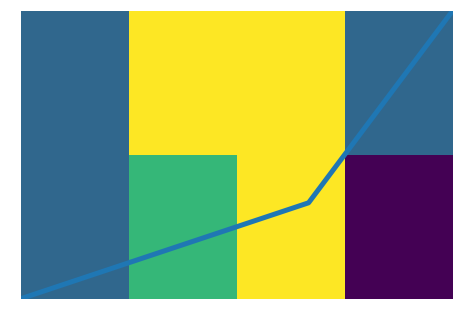

In [78]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.set_axis_off()

im = ax.imshow([[2,3,4,1], [2,4,4,2]], origin="lower", extent=[1,4,2,8])
ax.plot([1,2,3,4], [2,3,4,8], lw=5)

ax.set_aspect('auto')
plt.show()

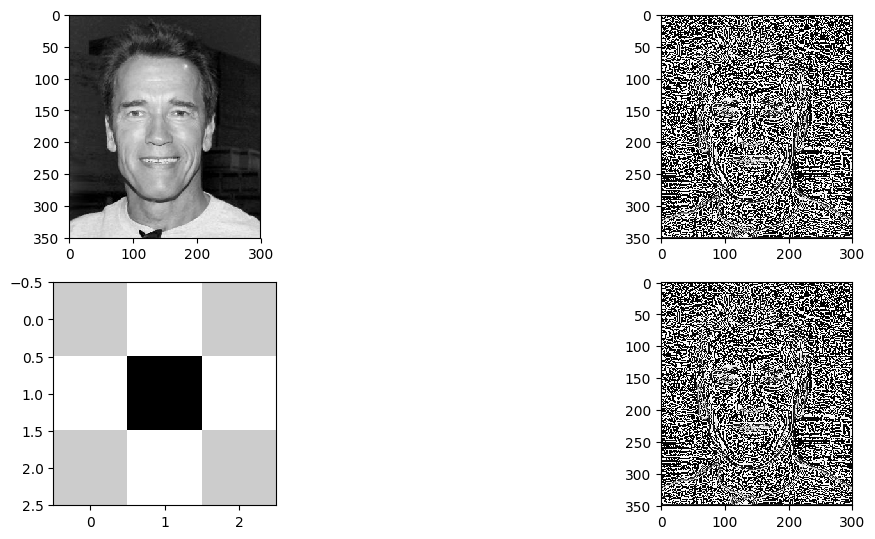

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import scipy.ndimage.filters as filter

def normalize(matrix):
    sum = np.sum(matrix)
    if sum > 0.:
        return matrix / sum
    else:
        return matrix

def neighbors(r,c,supermatrix): 
    m = supermatrix[r:r+3,c:c+3] 
    return m

def convolve(n,kernel):
    sum = 0
    for (rr,cc),value in np.ndenumerate(n):
        sum += n[rr,cc] * kernel[rr,cc]

    return sum % 255

def poor_mans_convolve(matrix,super,kernel,shape):
    result = np.ndarray(shape,dtype=np.float)

    for (r,c),value in np.ndenumerate(matrix):
        n = neighbors(r,c,super)
        result[r,c] = convolve(n,kernel)

    return result

fig = plt.figure(figsize=(14, 6.5), dpi=100)

kernel_edge_detect1 = np.array([[1.,0.,-1.],
                                [0.,0.,0.],
                                [-1.,0.,1.]])

kernel_edge_detect2 = np.array([[0.,1.,0.],
                                [1.,-4.,1.],
                                [0.,1.,0.]])

kernel_edge_detect3 = np.array([[-1.,-1.,-1.],
                                [-1.,8.,-1.],
                                [-1.,-1.,-1.]])

kernel_sharpen = np.array([[0.,-1.,0.],
                           [-1.,5.,-1.],
                           [0.,-1.,0.]])

kernel_sharpen2 = np.array([[-1.,-1.,-1.],
                           [-1.,9.,-1.],
                           [-1.,-1.,-1.]])

kernel_blur = np.array([[1.,1.,1.],
                        [1.,1.,1.],
                        [1.,1.,1.]])

kernel_list = [kernel_edge_detect1,kernel_edge_detect2,kernel_edge_detect3,kernel_sharpen,kernel_sharpen2,kernel_blur]
title_list = ['edge-detect1','edge-detect2','edge-detect3','sharpen1','sharpen2','blur']

#image=mpimg.imread('images/face_300.jpg')[:,:,0]
image = cv2.imread('images/face_300.jpg', 0)
shape = image.shape
newimage = np.ndarray(shape,dtype=np.float)
poorimage = np.ndarray(shape,dtype=np.float)
supershape = (shape[0] + 2,shape[1] + 2) 
supermatrix = np.zeros(supershape,dtype=np.float)
supermatrix[1:-1,1:-1] = image

imagelist_std_convolve = []
imagelist_poor_convolve = []

fig.add_subplot(4,4,1)
plt.title('Original')
#      plt.imshow(image,cmap=plt.cm.gray)
plt.axis('on')
kernel_list[i] = normalize(kernel_list[i])
newimage = filter.convolve(image,kernel_list[i],mode='constant', cval=0)
imagelist_std_convolve.append(newimage)
#print 'kernel'
#print kernel_list[i]

print
fig.add_subplot(4,4,i+2)
plt.title(title_list[i])
#      plt.imshow(newimage,cmap=plt.cm.gray)
plt.axis('off')
flipped_kernel = kernel_list[i].copy()
flipped_kernel = np.fliplr(flipped_kernel)
flipped_kernel = np.flipud(flipped_kernel)
flipped_kernel = normalize(flipped_kernel)
poorimage=poor_mans_convolve(image,supermatrix,flipped_kernel,shape)
imagelist_poor_convolve.append(poorimage)
#print 'flipped_kernel'
#print flipped_kernel
#print
#fig.add_subplot(4,4,i+2+6)
#plt.title('poors ' + title_list[i])
#     plt.imshow(poorimage,cmap=plt.cm.gray)
plt.axis("off")
#plt.show()

plt.subplot(2, 2, 1)
plt.imshow(image,cmap=plt.cm.gray)
plt.subplot(2, 2, 2)
plt.imshow(newimage,cmap=plt.cm.gray)
plt.subplot(2, 2, 3)
plt.imshow(flipped_kernel,cmap=plt.cm.gray)
plt.subplot(2, 2, 4)
plt.imshow(poorimage,cmap=plt.cm.gray)
plt.show()





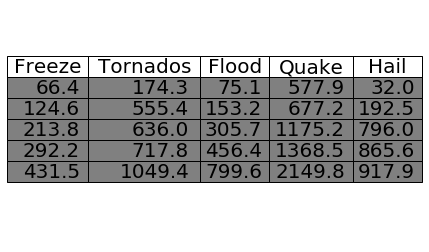

In [33]:
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib.backends.backend_pdf import PdfPages

data = [[  66386,  174296,   75131,  577908,   32015],
        [  58230,  381139,   78045,   99308,  160454],
        [  89135,   80552,  152558,  497981,  603535],
        [  78415,   81858,  150656,  193263,   69638],
        [ 139361,  331509,  343164,  781380,   52269]]
columns = ('Freeze', 'Tornados', 'Flood', 'Quake', 'Hail')
n_rows = len(data)
y_offset = np.array([0.0] * len(columns))
cell_text = []
for row in range(n_rows):
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x/1000.0) for x in y_offset])
cell_text = np.array(cell_text)
cell_colors = np.tile(np.ones_like(cell_text,float)[...,None] -0.5
                      ,(1,1,3))
fig = plt.figure()
axes = fig.add_subplot(111)
the_table = axes.table(cellText=cell_text,
                      colLabels=columns,
                        cellColours=cell_colors,
                      loc='center')
#he_table.properties()['celld'][0,0].get_text().set_fontweight(1000)
the_table.auto_set_font_size(False) 
the_table.scale(3, 3) 
the_table.set_fontsize(20)
table_prop = the_table.properties()
#fill the transpose or not, if we need col height or row width respectively.
rows_heights = [[] for i in range(len([cells for cells in 
                                     table_prop['celld'] if cells[1]==0]))]
cols_widths = [[] for i in range(len([cells for cells in 
                                     table_prop['celld'] if cells[0]==0]))]
for cell in table_prop['celld']:
    text = table_prop['celld'][(0,0)]._text._text

    bounds = table_prop['celld'][cell].get_text_bounds(fig.canvas.get_renderer())
    cols_widths[cell[1]].append(bounds[2])
    rows_heights[cell[0]].append(bounds[3])

cols_width = [max(widths) for widths in cols_widths]
rows_height = [max(heights) for heights in rows_heights]
for cell in table_prop['celld']:
    bounds = table_prop['celld'][cell].get_text_bounds(fig.canvas.get_renderer())                                            
    #For a larger image comment out the next line
    table_prop['celld'][cell].set_bounds(*(bounds[:2]+(1.2*cols_width[cell[1]], 1.1*rows_height[cell[0]],)))
plt.axis('off')
plt.show()

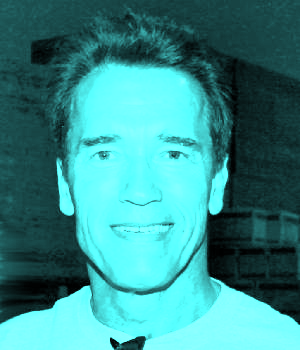

In [638]:
from PIL import Image
from StringIO import StringIO
imP = Image.open('images/face_300.jpg')
rgb2xyz = (
     0.2, 0.2, 0.2, 0,
     0.6, 0.6, 0.6, 0,
     0.6, 0.6, 0.6, 0 )
out = imP.convert("RGB", rgb2xyz)

out

In [ ]:
import 

In [ ]:
import 

In [56]:
img = cv2.imread('images/face_300.jpg')
im_color = cv2.applyColorMap(img, cv2.COLORMAP_HSV)
cv2.imshow('mapped_image', im_color)
cv2.imwrite('images/face_HSV.png', im_color)
cv2.waitKey(0)

255

In [509]:
green = np.uint8([[[0,255,0 ]]])
hsv_green = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
print hsv_green


[[[ 60 255 255]]]


In [534]:
!wget -O images/test-color.png http://i.stack.imgur.com/i4sMR.png

--2017-07-26 19:24:58--  http://i.stack.imgur.com/i4sMR.png
Resolving i.stack.imgur.com (i.stack.imgur.com)... 104.16.111.18, 104.16.109.18, 104.16.108.18, ...
Connecting to i.stack.imgur.com (i.stack.imgur.com)|104.16.111.18|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17576 (17K) [image/png]
Saving to: ‘images/test-color.png’

images/test-color.p 100%[===================>]  17.16K  --.-KB/s    in 0.07s   

2017-07-26 19:24:58 (261 KB/s) - ‘images/test-color.png’ saved [17576/17576]



In [558]:
# import cv2
import numpy as np
from PIL import Image
#cap = Image.open('images/face_300.jpg')
#cap = cv2.imread('images/hicks-test2.png')
cap = cv2.imread('images/test-color.png')
while(1):
    # Take each frame
    frame = cap
    # Convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    # define range of blue color in HSV
    #lower_blue = np.array([110,50,50])
    #upper_blue = np.array([130,255,255])
    
    #lower_blue = np.array([90,0,0])
    #upper_blue = np.array([255,255,255])
    
    lower_red = np.array([0,0,200])
    upper_red = np.array([255,255,255])
    #lower_red = np.array([50,10,10])
    #upper_red = np.array([255,155,130])
    
    
    

    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_red, upper_red)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame,frame, mask= mask)

    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()


In [547]:
print [sub for sub in dir(cv2) if sub.startswith('COLORMAP_')]

['COLORMAP_AUTUMN', 'COLORMAP_BONE', 'COLORMAP_COOL', 'COLORMAP_HOT', 'COLORMAP_HSV', 'COLORMAP_JET', 'COLORMAP_OCEAN', 'COLORMAP_PARULA', 'COLORMAP_PINK', 'COLORMAP_RAINBOW', 'COLORMAP_SPRING', 'COLORMAP_SUMMER', 'COLORMAP_WINTER']


In [55]:
invert_value = 1
table = np.array([( i * invert_value) for i in np.arange(256)]).astype("uint8")
img0 = cv2.imread('images/face_300.jpg')
cv2.LUT(img0, table)

array([[[ 41,  50,  59],
        [ 41,  50,  59],
        [ 40,  49,  58],
        ..., 
        [ 36,  47,  51],
        [ 36,  47,  51],
        [ 36,  47,  51]],

       [[ 38,  47,  56],
        [ 38,  47,  56],
        [ 38,  47,  56],
        ..., 
        [ 35,  46,  50],
        [ 35,  46,  50],
        [ 35,  46,  50]],

       [[ 37,  46,  55],
        [ 37,  46,  55],
        [ 39,  48,  57],
        ..., 
        [ 36,  47,  51],
        [ 36,  47,  51],
        [ 36,  47,  51]],

       ..., 
       [[190, 213, 221],
        [194, 217, 225],
        [198, 221, 229],
        ..., 
        [200, 226, 232],
        [200, 226, 232],
        [200, 226, 232]],

       [[196, 217, 225],
        [199, 220, 228],
        [201, 222, 230],
        ..., 
        [201, 226, 230],
        [201, 226, 230],
        [200, 225, 229]],

       [[200, 221, 229],
        [201, 222, 230],
        [201, 222, 230],
        ..., 
        [201, 226, 230],
        [203, 228, 232],
        [204, 229,

In [58]:
!ls numpy-filters


color_cyan.npy	edge_filter.npy     sharp_filter.npy
colors.npy	sharpen_filter.npy  supersharp_filter.npy


In [65]:
img = cv2.imread('images/face_300.jpg')
MyKernel = np.load('numpy-filters/cv2LUT_HSV.npy')

#im_color = cv2.applyColorMap(img, MyKernel)
cv2.imshow('mapped_image', MyKernel)
#cv2.imwrite('images/face_HSV.png', im_color)
cv2.waitKey(0)

255

# Image converted to Numpy array and saved as *.npy

In [66]:
# Image converted to Numpy array and saved as cv2LUT_HSV.npy
invert_value = 1
table = np.array([( i * invert_value) for i in np.arange(256)]).astype("uint8")
img0 = cv2.imread('images/face_HSV.png')
kernel = cv2.LUT(img0, table)

np.save('numpy-filters/cv2LUT_HSV', kernel)    # .npy extension is added if not given
d = np.load('numpy-filters/cv2LUT_HSV.npy')
# Verify image
kernel == d


array([[[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ..., 
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ..., 
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ..., 
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       ..., 
       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ..., 
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ..., 
        [ True,  True,  True],
        [ True,  True,  True],
        [ 

In [96]:
# Image converted to Numpy array and saved as cv2LUT_HSV.npy
invert_value = 1
table = np.array([( i * invert_value) for i in np.arange(256)]).astype("uint8")
img1 = cv2.imread('images/face_300.jpg')
kernel = cv2.LUT(img1, table)

np.save('numpy-filters/cv2LUT_300', kernel)    # .npy extension is added if not given
e = np.load('numpy-filters/cv2LUT_300.npy')
# Verify image
kernel == e


array([[[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ..., 
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ..., 
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ..., 
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       ..., 
       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ..., 
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ..., 
        [ True,  True,  True],
        [ True,  True,  True],
        [ 

In [127]:
from PIL import Image

# Image converted to Numpy array and saved as cv2LUT_HSV.npy
invert_value = 1
table = np.array([( i * invert_value) for i in np.arange(256)]).astype("uint8")
img1 = cv2.imread('images/face_300.jpg')
kernel = cv2.LUT(img1, table)



In [144]:
!ls images

face_300.jpg  face-i.png  face.png     numpx2.png  numpxr2.png
face_HSV.png  face.jpg	  NPimage.png  numpxh.png


In [131]:
import cv2
d = np.load('numpy-filters/cv2LUT_HSV.npy')
d2 = np.load('numpy-filters/cv2LUT_300.npy')
g = d - d2
#im = Image.fromarray(np.uint8(cm.gist_earth(myarray)*255))
#im = Image.fromarray(np.uint8(d*255)
cv2.imwrite("images/numpx2.png", g)
!showme images/numpx2.png



In [133]:
import cv2
d = np.load('numpy-filters/cv2LUT_HSV.npy')
d2 = np.load('numpy-filters/cv2LUT_300.npy')
h = d + d2
#im = Image.fromarray(np.uint8(cm.gist_earth(myarray)*255))
#im = Image.fromarray(np.uint8(d*255)
cv2.imwrite("images/numpxh.png", h)
!showme images/numpxh.png



In [136]:
import cv2
r = cv2.imread("images/face_300.jpg")
d = np.load('numpy-filters/cv2LUT_HSV.npy')
d2 = np.load('numpy-filters/cv2LUT_300.npy')
rh = d2 + r
#im = Image.fromarray(np.uint8(cm.gist_earth(myarray)*255))
#im = Image.fromarray(np.uint8(d*255)
cv2.imwrite("images/numpxh.png", rh)
!showme images/numpxh.png



In [136]:
import cv2
r = cv2.imread("images/face_300.jpg")
d = np.load('numpy-filters/cv2LUT_HSV.npy')
d2 = np.load('numpy-filters/cv2LUT_300.npy')
rh = d + r
#im = Image.fromarray(np.uint8(cm.gist_earth(myarray)*255))
#im = Image.fromarray(np.uint8(d*255)
cv2.imwrite("images/numpxh.png", rh)
!showme images/numpxh.png



In [158]:
!wget -O images/hicks01.jpg https://images.fineartamerica.com/images/artworkimages/mediumlarge/1/noahs-ark-james-edwin-mcconnell.jpg

--2017-07-26 13:23:23--  https://images.fineartamerica.com/images/artworkimages/mediumlarge/1/noahs-ark-james-edwin-mcconnell.jpg
Resolving images.fineartamerica.com (images.fineartamerica.com)... 54.192.119.110, 54.192.119.245, 54.192.119.95, ...
Connecting to images.fineartamerica.com (images.fineartamerica.com)|54.192.119.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 154514 (151K) [image/jpeg]
Saving to: ‘images/hicks01.jpg’

images/hicks01.jpg  100%[===================>] 150.89K   232KB/s    in 0.7s    

2017-07-26 13:23:25 (232 KB/s) - ‘images/hicks01.jpg’ saved [154514/154514]



In [151]:
!wget -O images/hicks02.jpg https://upload.wikimedia.org/wikipedia/commons/2/23/Noahs_Ark.jpg

--2017-07-26 13:16:13--  https://upload.wikimedia.org/wikipedia/commons/2/23/Noahs_Ark.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 197275 (193K) [image/jpeg]
Saving to: ‘images/hicks02.jpg’

images/hicks02.jpg  100%[===================>] 192.65K   215KB/s    in 0.9s    

2017-07-26 13:16:14 (215 KB/s) - ‘images/hicks02.jpg’ saved [197275/197275]



In [164]:
from PIL import Image
h1 = Image.open("images/hicks01.jpg")
h2 = Image.open("images/hicks02.jpg")
h1.size, h2.size

((900, 857), (942, 819))

In [190]:
from PIL import Image
h2s = h2.resize((675,640), Image.NEAREST)
h2s.save("images/S-hicks02.jpg")

In [191]:
from PIL import Image
h1s = h1.resize((675,640), Image.NEAREST)
h1s.save("images/S-hicks01.jpg")

In [192]:
import cv2
r = cv2.imread("images/S-hicks01.jpg")
r2 = cv2.imread("images/S-hicks02.jpg")

rr2 = (r + r2)
#im = Image.fromarray(np.uint8(cm.gist_earth(myarray)*255))
#im = Image.fromarray(np.uint8(d*255)
cv2.imwrite("images/hicks3a.png", rr2)
!showme images/hicks3a.png



In [196]:
import numpy as np
from sklearn.preprocessing import normalize
r = cv2.imread("images/S-hicks01.jpg")
r2 = cv2.imread("images/S-hicks02.jpg")

rr2 = (r + r2)
sqr2 = (rr2/3)-20

cv2.imwrite("images/hicks-sqr.png", sqr2)
!showme images/hicks-sqr.png


In [200]:
import numpy as np
from sklearn.preprocessing import normalize
r = cv2.imread("images/S-hicks01.jpg")
r2 = cv2.imread("images/S-hicks02.jpg")
r = r/2
rr2 = (r + r2)
sqr3 = (rr2/3)-15

cv2.imwrite("images/hicks-sqr3.png", sqr3)
!showme images/hicks-sqr3.png


In [201]:
import numpy as np
from sklearn.preprocessing import normalize
r = cv2.imread("images/S-hicks01.jpg")
r2 = cv2.imread("images/S-hicks02.jpg")
r = r*.3
rr2 = (r + r2)
sqr4 = (rr2/3)-15

cv2.imwrite("images/hicks-sqr4.png", sqr4)
!showme images/hicks-sqr4.png


In [207]:
import numpy as np
from sklearn.preprocessing import normalize
r = cv2.imread("images/S-hicks01.jpg")
r2 = cv2.imread("images/S-hicks02.jpg")
r = r*.3
rr2 = (r + r2)
sqr4 = (rr2/3)+25

cv2.imwrite("images/hicks-sqr4.png", sqr4)
!showme images/hicks-sqr4.png


# Increase Contrast 

In [224]:
from PIL import Image
def change_contrast(img, level):
    factor = (259 * (level + 255)) / (255 * (259 - level))
    def contrast(c):
        return 128 + factor * (c - 100)
    return img.point(contrast)

nimC = change_contrast(Image.open("images/hicks-sqr4.png"), 100)
nimC.save("images/hicks-post.png")
!showme images/hicks-post.png

In [231]:
from PIL import Image
def change_contrast(img, level):
    factor = (259 * (level + 255)) / (255 * (259 - level))
    def contrast(c):
        return 128 + factor * (c - 80)
    return img.point(contrast)

nimC = change_contrast(Image.open("images/hicks-sqr4.png"), 135)
nimC.save("images/hicks-post2.png")
!showme images/hicks-post2.png

# The completed process to be turned into a function

In [236]:
import numpy as np
from sklearn.preprocessing import normalize
r = cv2.imread("images/S-hicks01.jpg")
r2 = cv2.imread("images/S-hicks02.jpg")

#This works as a blend it can be applied to either image in different degrees
r2 = r2*.4

rr2 = (r + r2)
sqr4 = (rr2/3)+25

cv2.imwrite("images/hicks-lev.png", sqr4)
!showme images/hicks-lev.png


In [237]:
from PIL import Image
def change_contrast(img, level):
    factor = (259 * (level + 255)) / (255 * (259 - level))
    def contrast(c):
        return 128 + factor * (c - 80)
    return img.point(contrast)

nimC = change_contrast(Image.open("images/hicks-lev.png"), 135)
nimC.save("images/hicks-post3.png")
!showme images/hicks-post3.png

In [339]:
import cv2
r = cv2.imread("images/S-hicks01.jpg")
r2 = cv2.imread("images/S-hicks02.jpg")
r3 = cv2.imread("images/waves.jpg")
r = r *.8
r2 = r2*.3
r3 = r3*.5
rr2 = ((r + r2) +r3)-10
sqr4 = (rr2/3)

#im = Image.fromarray(np.uint8(cm.gist_earth(myarray)*255))
#im = Image.fromarray(np.uint8(d*255)
#cv2.imwrite("images/hicks-water.png", rr2)
cv2.imwrite("images/hicks-water1.png", sqr4)
!showme images/hicks-water1.png



In [341]:
from PIL import Image
def change_contrast(img, level):
    factor = (259 * (level + 255)) / (255 * (259 - level))
    def contrast(c):
        return 128 + factor * (c - 80)
    return img.point(contrast)

nimC = change_contrast(Image.open("images/hicks-water1.png"), 125)
nimC.save("images/hicks-post-water1.png")
!showme images/hicks-post-water1.png

# The two above cells can open blend and adjust contrast to two images

In [339]:
import cv2
r = cv2.imread("images/S-hicks01.jpg")
r2 = cv2.imread("images/S-hicks02.jpg")
r3 = cv2.imread("images/waves.jpg")
r = r *.8
r2 = r2*.3
r3 = r3*.5
rr2 = ((r + r2) +r3)-10
sqr4 = (rr2/3)

#im = Image.fromarray(np.uint8(cm.gist_earth(myarray)*255))
#im = Image.fromarray(np.uint8(d*255)
#cv2.imwrite("images/hicks-water.png", rr2)
cv2.imwrite("images/hicks-water1.png", sqr4)
!showme images/hicks-water1.png



In [341]:
from PIL import Image
def change_contrast(img, level):
    factor = (259 * (level + 255)) / (255 * (259 - level))
    def contrast(c):
        return 128 + factor * (c - 80)
    return img.point(contrast)

nimC = change_contrast(Image.open("images/hicks-water1.png"), 125)
nimC.save("images/hicks-post-water1.png")
!showme images/hicks-post-water1.png

# This may be handy to find available fonts
!locate *.ttf

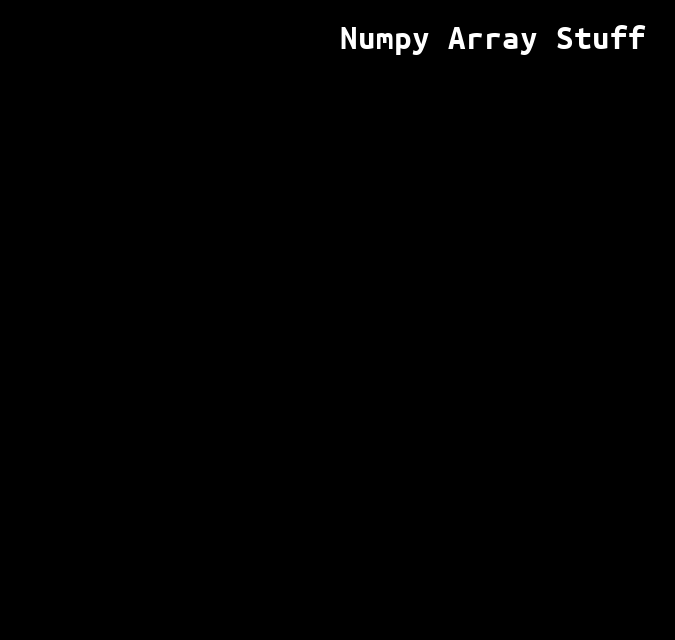

In [8]:
import PIL
from PIL import ImageFont
from PIL import Image
from PIL import ImageDraw

font = ImageFont.truetype("/usr/share/fonts/truetype/ubuntu-font-family/UbuntuMono-B.ttf",35)
img=Image.new("RGBA", (675,640),(0,0,0))
draw = ImageDraw.Draw(img)
draw.text((340,20),"Numpy Array Stuff",(255,255,255),font=font)

draw = ImageDraw.Draw(img)

img.save("images/text.jpg")
img

In [391]:
!showme images/S-hicks02.jpg

In [409]:
import cv2
r1 = cv2.imread("images/S-hicks01.jpg")
r2 = cv2.imread("images/text.jpg")
r3 = cv2.imread("images/waves.jpg")
r4 = cv2.imread("images/S-hicks02.jpg")
r1 = r * 1.5
r2 = r2 *.8
r3 = r3 *.3
r4 = r4 

to = r1+r2+r3+r4 

#r2 = r2*.2

#rr2 = ((r + r2) +r3)-200
#sqr4 = (rr2/3)
ave = (to/4)-40

#im = Image.fromarray(np.uint8(cm.gist_earth(myarray)*255))
#im = Image.fromarray(np.uint8(d*255)
cv2.imwrite("images/hicks-mask.png", ave)
!showme images/hicks-mask.png



In [412]:
from PIL import Image
def change_contrast(img, level):
    factor = (259 * (level + 255)) / (255 * (259 - level))
    def contrast(c):
        return 128 + factor * (c - 50)
    return img.point(contrast)

nimC = change_contrast(Image.open("images/hicks-mask.png"),110)
nimC.save("images/hicks-mask3.png")
!showme images/hicks-mask3.png

In [580]:
# import cv2
import numpy as np
from PIL import Image
#cap = Image.open('images/face_300.jpg')
cap = cv2.imread('images/face_300.jpg')
#cap = cv2.imread('images/test-color.png')
while(1):
    # Take each frame
    frame = cap
    # Convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_red = np.array([0,0,200])
    upper_red = np.array([255,255,255])
    
    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_red, upper_red)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame,frame, mask= mask)

    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('hsv',hsv)
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()


# SAVE from  HERE UP

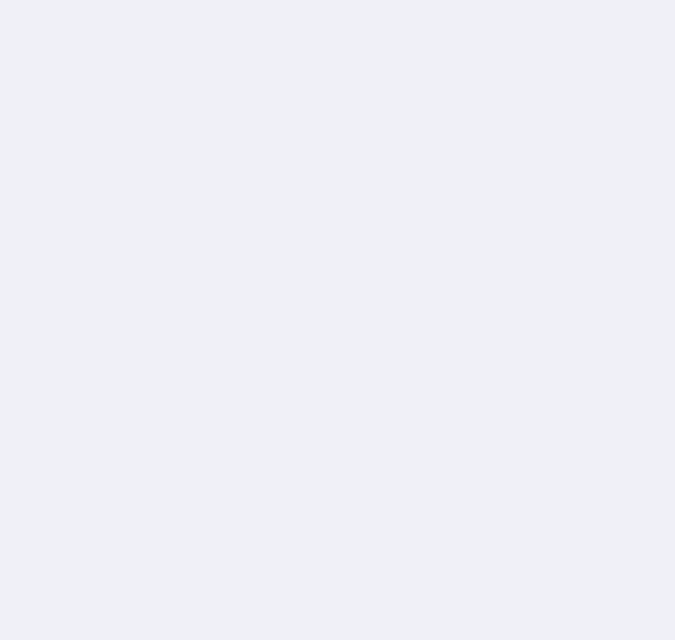

In [452]:
from PIL import Image, ImageFont, ImageDraw
from PIL import ImageEnhance
import cv2

img1 = Image.new("RGBA", (675, 640), color=(0, 0, 125, 15))
img1

In [460]:
from PIL import Image, ImageFont, ImageDraw
from PIL import ImageEnhance
import cv2

img1 = Image.new("RGBA", (675, 640), color=(0, 0, 125, 5))
dr1 = ImageDraw.Draw(img1)
fnt = ImageFont.truetype("/home/jack/.fonts/LuckiestGuy.ttf",35)
dr1.text((230, 15), "Three Images Combined", font=fnt, fill=(255, 255, 0, 128))
img1.save('images/test_out.png')

r1 = cv2.imread("images/S-hicks01.jpg")
r2 = cv2.imread("images/test_out.png")
r3 = cv2.imread("images/waves.jpg")
r4 = cv2.imread("images/S-hicks02.jpg")

r1 = r * 1.5
r2 = r2 *.2
r3 = r3 *.3
r4 = r4 

to = r1+r2+r3+r4 
ave = (to/4)-40

cv2.imwrite("images/hicks-mask2.png", ave)

def change_contrast(img, level):
    factor = (259 * (level + 255)) / (255 * (259 - level))
    def contrast(c):
        return 128 + factor * (c - 50)
    return img.point(contrast)

nimC = change_contrast(Image.open("images/hicks-mask2.png"),120)
nimC.save("images/hicks-mask4.png")
!showme images/hicks-mask4.png


In [569]:

from skimage import data, color, io, img_as_float
import numpy as np
import matplotlib.pyplot as plt

alpha = 0.6
#img = Image.open("images/hicks-mask.png")
img = cv2.imread("images/hicks-mask.png")

#img = img_as_float(data.camera())
#rows, cols = img.shape

# Construct a colour image to superimpose
color_mask = np.zeros((rows, cols, 3))
color_mask[30:140, 30:140] = [1, 0, 0]  # Red block
color_mask[170:270, 40:120] = [0, 1, 0] # Green block
color_mask[200:350, 200:350] = [0, 0, 1] # Blue block

# Construct RGB version of grey-level image
img_color = np.dstack((img, img, img))

# Convert the input image and color mask to Hue Saturation Value (HSV)
# colorspace
img_hsv = color.rgb2hsv(img_color)
color_mask_hsv = color.rgb2hsv(color_mask)

# Replace the hue and saturation of the original image
# with that of the color mask
img_hsv[..., 0] = color_mask_hsv[..., 0]
img_hsv[..., 1] = color_mask_hsv[..., 1] * alpha

img_masked = color.hsv2rgb(img_hsv)

# Display the output
f, (ax0, ax1, ax2) = plt.subplots(1, 3,
                                  subplot_kw={'xticks': [], 'yticks': []})
ax0.imshow(img, cmap=plt.cm.gray)
ax1.imshow(color_mask)
ax2.imshow(img_masked)
plt.show()

ValueError: the input array must be have a shape == (.., ..,[ ..,] 3)), got (640, 675, 9)

In [559]:
from PIL import Image, ImageFont, ImageDraw
from PIL import ImageEnhance
import cv2

img1 = Image.new("RGBA", (675, 640), color=(0, 0, 125, 5))
dr1 = ImageDraw.Draw(img1)
fnt = ImageFont.truetype("/home/jack/.fonts/LuckiestGuy.ttf",35)
dr1.text((230, 15), "Three Images Combined", font=fnt, fill=(255, 255, 0, 128))
img1.save('images/test_out.png')

r1 = cv2.imread("images/S-hicks01.jpg")
r2 = cv2.imread("images/test_out.png")
r3 = cv2.imread("images/waves.jpg")
r4 = cv2.imread("images/S-hicks02.jpg")

r1 = r * 1.5
r2 = r2 *.2
r3 = r3 *.3
r4 = r4 

to = r1+r2+r3+r4 
ave = (to/4)-45

#image = Image.fromarray(ave.astype('uint8'), 'RGB')
image = Image.fromarray(ave.astype('uint8'), 'RGB')

def change_contrast(level):
    factor = (259 * (level + 255)) / (255 * (259 - level))
    def contrast(c):
        return 128 + factor * (c - 150)
    return image.point(contrast)

nimC = change_contrast(180)
nimC.save("images/hicks-test3.png")
!showme images/hicks-test3.png


In [584]:
# import cv2
import numpy as np
from PIL import Image
#cap = Image.open('images/face_300.jpg')
cap = cv2.imread('images/face_300.jpg')
#cap = cv2.imread('images/test-color.png')
while(1):
    # Take each frame
    frame = cap
    # Convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    #colormask = cv2.cvtColor(frame, cv2.COLOR_RGB2HSV)
    #hsv Hue Saturation Value
    lower_red = np.array([200,250,200])
    upper_red = np.array([255,255,255])
    
    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_red, upper_red)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame, frame, mask= mask)

    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    #cv2.imshow('colormask',colormask)
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()


In [608]:
# import cv2
import numpy as np
from PIL import Image
#cap = Image.open('images/face_300.jpg')
#cap = cv2.imread('images/face.jpg')
cap = cv2.imread('images/test-color.png')
while(1):
    # Take each frame
    frame = cap
    # Convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    #hue 0-85  85-170 170-255
    
    upper_blue = np.array([255,255,255])
    lower_blue = np.array([100,50,50])
    
    upper_green= np.array([100,255,255])
    lower_green = np.array([40,50,50])
    
    upper_red = np.array([40,255,255])
    lower_red = np.array([0,50,50])
    
    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_green, upper_green)
    mask2 = cv2.inRange(hsv, lower_blue, upper_blue)
    mask3 = cv2.inRange(hsv, lower_red, upper_red)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame,frame, mask= mask)

    #cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('mask2',mask2)
    cv2.imshow('mask3',mask3)
    #cv2.imshow('hsv',hsv)
    #cv2.imshow('res',res)
    
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()


In [578]:
import cv2
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print flags

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_BGR2HSV_FULL', 'COLOR_BGR2LAB', 'COLOR_BGR2LUV', 'COLOR_BGR2Lab', 'COLOR_BGR2Luv', 'COLOR_BGR2RGB', 'COLOR_BGR2RGBA', 'COLOR_BGR2XYZ', 'COLOR_BGR2YCR_CB', 'COLOR_BGR2YCrCb', 'COLOR_BGR

In [563]:
img = cv2.imread("images/face.jpg")

color_mask = np.zeros((rows, cols, 3))
color_mask[30:140, 30:140] = [1, 0, 0]  # Red block
color_mask[170:270, 40:120] = [0, 1, 0] # Green block
color_mask[200:350, 200:350] = [0, 0, 1] # Blue block

# Construct RGB version of grey-level image
img_color = np.dstack((img, img, img))

# Convert the input image and color mask to Hue Saturation Value (HSV)
# colorspace
img_hsv = color.rgb2hsv(img_color)
color_mask_hsv = color.rgb2hsv(color_mask)









NC = cv2.cvtColor(col, cv2.COLOR_BAYER_BG2BGR)

cv2.imshow(NC)

ValueError: the input array must be have a shape == (.., ..,[ ..,] 3)), got (825, 726, 9)

In [ ]:
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
from PIL import ImageEnhance
import cv2

fnt = ImageFont.truetype("/home/jack/.fonts/LuckiestGuy.ttf",35)
img1 = Image.new("RGBA", 100, 100, color=(0, 0, 0, 230)) #RGBA
dr1 = ImageDraw.Draw(img1)
dr1.text((5, 5), "some text", font=fnt)

# my source image
my_img.paste(dr1, (10, 10))
my_img.save("images/out_file.png", "PNG")

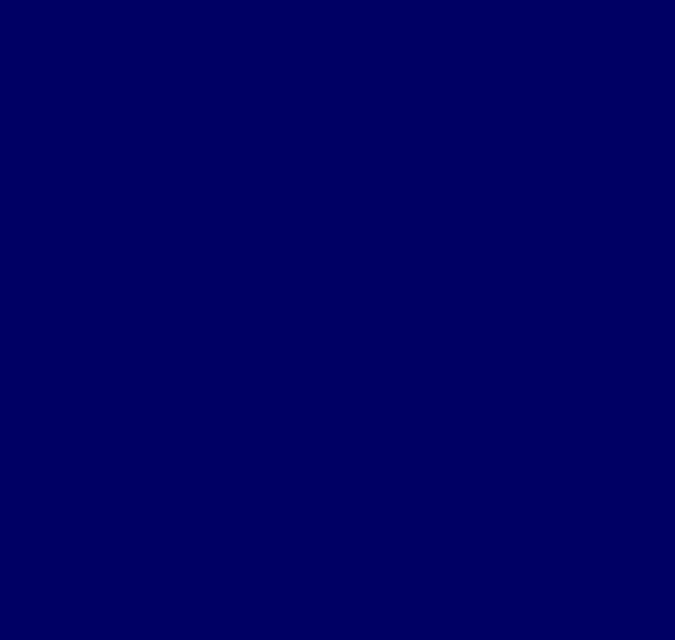

In [424]:
img=Image.new("RGBA", (675,640),(0,0,100))
img

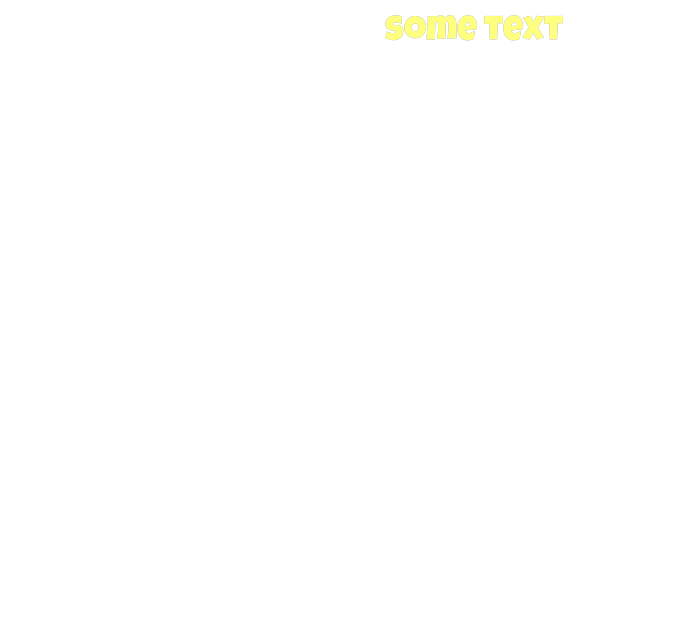

In [431]:
from PIL import Image, ImageFont, ImageDraw
img1 = Image.new("RGBA", (675, 640), color=(0, 0, 0, 0))
dr1 = ImageDraw.Draw(img1)
fnt = ImageFont.truetype("/home/jack/.fonts/LuckiestGuy.ttf",35)
dr1.text((330, 15), "some text", font=fnt, fill=(255, 255, 0, 128))
#img1.show()
img1.save('images/test_out.png')
img1

In [422]:
#img = Image.open("images/hicks-mask.png")
#img = cv2.imread("images/hicks-mask.png")
from PIL import Image
from PIL import ImageDraw

im = Image.new("P", (400, 400), 0)

im.putpalette([
    0, 0, 0, # black background
    255, 0, 0, # index 1 is red
    255, 255, 0, # index 2 is yellow
    255, 153, 0, # index 3 is orange
])

d = ImageDraw.ImageDraw(im)
d.setfill(1)

d.setink(1)
d.polygon((0, 0, 0, 400, 400, 400))

d.setink(3)
d.rectangle((100, 100, 300, 300))

d.setink(2)
d.ellipse((120, 120, 280, 280))

im.save("images/pallet-out.png")
!showme images/pallet-out.png

AttributeError: 'ImageDraw' object has no attribute 'setfill'

In [570]:
# import cv2
import numpy as np
from PIL import Image
#cap = Image.open('images/face_300.jpg')
cap = cv2.imread('images/face_300.jpg')
#cap = cv2.imread('images/test-color.png')
while(1):
    # Take each frame
    frame = cap
    # Convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_red = np.array([0,0,200])
    upper_red = np.array([255,255,255])
    
    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_red, upper_red)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame,frame, mask= mask)

    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('hsv',hsv)
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()


In [418]:

from skimage import data, color, io, img_as_float
import numpy as np
import matplotlib.pyplot as plt

alpha = 0.6
#img = Image.open("images/hicks-mask.png")
img = cv2.imread("images/hicks-mask.png")

#img = img_as_float(data.camera())
#rows, cols = img.shape

# Construct a colour image to superimpose
color_mask = np.zeros((rows, cols, 3))
color_mask[30:140, 30:140] = [1, 0, 0]  # Red block
color_mask[170:270, 40:120] = [0, 1, 0] # Green block
color_mask[200:350, 200:350] = [0, 0, 1] # Blue block

# Construct RGB version of grey-level image
img_color = np.dstack((img, img, img))

# Convert the input image and color mask to Hue Saturation Value (HSV)
# colorspace
img_hsv = color.rgb2hsv(img_color)
color_mask_hsv = color.rgb2hsv(color_mask)

# Replace the hue and saturation of the original image
# with that of the color mask
img_hsv[..., 0] = color_mask_hsv[..., 0]
img_hsv[..., 1] = color_mask_hsv[..., 1] * alpha

img_masked = color.hsv2rgb(img_hsv)

# Display the output
f, (ax0, ax1, ax2) = plt.subplots(1, 3,
                                  subplot_kw={'xticks': [], 'yticks': []})
ax0.imshow(img, cmap=plt.cm.gray)
ax1.imshow(color_mask)
ax2.imshow(img_masked)
plt.show()

ValueError: the input array must be have a shape == (.., ..,[ ..,] 3)), got (640, 675, 9)

In [312]:
import cv2
r = cv2.imread("images/S-hicks01.jpg")
r2 = cv2.imread("images/S-hicks02.jpg")
r3 = cv2.imread("images/waves.jpg")









r = r *.8
r2 = r2*.2

rr2 = ((r + r2) +r3)-200
sqr4 = (rr2/3)

#im = Image.fromarray(np.uint8(cm.gist_earth(myarray)*255))
#im = Image.fromarray(np.uint8(d*255)
#cv2.imwrite("images/hicks-water.png", rr2)
cv2.imwrite("images/hicks-water1.png", sqr4)
!showme images/hicks-water1.png



In [246]:
import numpy as np
from sklearn.preprocessing import normalize
r = cv2.imread("images/S-hicks01.jpg")
r2 = cv2.imread("images/S-hicks02.jpg")
r3 = cv2.imread("images/waves.jpg")

#rr2 = r+r2+r3
rr2 = (r + r2)

#This works as a blend it can be applied to either image in different degrees
#r2 = r2*.4

#rr2 = (r + r2)
#sqr4 = (rr2/3)+25

#cv2.imwrite("images/hicks-wave.png", sqr4)
cv2.imwrite("images/hicks-wave.png", rr2)
!showme images/hicks-wav.png


No image data


In [245]:
!ls images

face_300.jpg  hicks01.jpg      hicks-post3.png	NPimage.png    S-hicks02.jpg
face_HSV.png  hicks02.jpg      hicks-post.png	numpx2.png     waves.jpg
face-i.jpg    hicks3a.png      hicks-sqr3.png	numpxh.png
face-i.png    hicks3.png       hicks-sqr4.png	numpxhr2.png
face.jpg      hicks-lev.png    hicks-sqr.png	numpxr2.png
face.png      hicks-post2.png  hicks-wave.png	S-hicks01.jpg


In [239]:
import numpy as np
from sklearn.preprocessing import normalize
r = cv2.imread("images/S-hicks01.jpg")
r2 = cv2.imread("images/S-hicks02.jpg")
r3 = cv2.imread("images/waves.jpg")


rr2 = r3 + (r + r2)

norm1 = rr2 / np.linalg.norm(rr2)
norm2 = normalize(rr2[:,np.newaxis], axis=0).ravel()
print np.all(norm1 == norm2)
# True

ValueError: Found array with dim 4. the normalize function expected <= 2.

In [170]:
import cv2
from PIL import Image
import numpy as np
r = cv2.imread("images/face.jpg")
r2 = cv2.imread("images/face-i.jpg")

rh = r + r2
#im = Image.fromarray(np.uint8(cm.gist_earth(myarray)*255))
#im = Image.fromarray(np.uint8(d*255)
cv2.imwrite("images/numpxhr2.png", rh)
!showme images/numpxhr2.png


In [176]:
list(h2s.getdata())

[(41, 41, 39),
 (47, 48, 43),
 (49, 52, 45),
 (47, 50, 41),
 (37, 40, 29),
 (37, 40, 29),
 (35, 38, 29),
 (42, 45, 36),
 (36, 36, 34),
 (40, 42, 37),
 (42, 45, 38),
 (40, 43, 36),
 (36, 39, 32),
 (40, 45, 39),
 (37, 42, 36),
 (42, 43, 38),
 (39, 40, 35),
 (37, 38, 33),
 (46, 47, 42),
 (49, 50, 45),
 (32, 32, 30),
 (30, 30, 28),
 (31, 31, 29),
 (34, 31, 24),
 (36, 36, 28),
 (33, 32, 27),
 (38, 39, 33),
 (42, 45, 38),
 (35, 40, 33),
 (33, 38, 31),
 (32, 37, 31),
 (32, 30, 33),
 (31, 29, 30),
 (37, 38, 33),
 (37, 40, 33),
 (36, 39, 32),
 (29, 34, 28),
 (28, 33, 27),
 (30, 35, 31),
 (31, 33, 30),
 (33, 35, 32),
 (35, 36, 31),
 (32, 31, 27),
 (26, 22, 19),
 (26, 22, 19),
 (43, 38, 35),
 (35, 34, 29),
 (26, 25, 23),
 (26, 24, 25),
 (26, 26, 28),
 (20, 20, 22),
 (24, 24, 24),
 (17, 19, 14),
 (18, 20, 15),
 (20, 25, 21),
 (16, 18, 15),
 (18, 20, 17),
 (21, 23, 20),
 (28, 28, 26),
 (24, 24, 22),
 (32, 32, 30),
 (36, 35, 33),
 (36, 35, 33),
 (40, 38, 39),
 (29, 29, 27),
 (33, 34, 29),
 (35, 38, 

In [170]:
import cv2
from PIL import Image
import numpy as np
r = cv2.imread("images/face.jpg")
r2 = cv2.imread("images/face-i.jpg")

rh = r + r2
#im = Image.fromarray(np.uint8(cm.gist_earth(myarray)*255))
#im = Image.fromarray(np.uint8(d*255)
cv2.imwrite("images/numpxhr2.png", rh)
!showme images/numpxhr2.png


In [87]:
def my_func(a):
    """Average first and last element of a 1-D array"""
    return (a[0] + a[-1]) * 0.5
b = cv2.imread('images/face_300.jpg')
nm = np.apply_along_axis(my_func, 0, b)
#array([ 4.,  5.,  6.])
#np.apply_along_axis(my_func, 1, b)
#array([ 2.,  5.,  8.])


/home/jack/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: overflow encountered in ubyte_scalars
  app.launch_new_instance()


In [89]:
!ls images

face_300.jpg  face_HSV.png  face.jpg  face.png	NPimage.png


In [90]:
!showme images/NPimage.png

In [91]:
import numpy as np
d = np.load('numpy-filters/cv2LUT_HSV.npy')
#image = d # your source data
#image = cv2.imread('images/face_300.jpg')


#image = image.astype(np.float32) # convert to float
#image -= image.min(2,2,0) # ensure the minimal value is 0.0
#image /= image.max() # maximum valu
cv2.imwrite("images/NPimage.png", d)
!showme images/NPimage.png

In [78]:
import numpy as np
#d = np.load('numpy-filters/cv2LUT_HSV.npy')
#image = d # your source data
image = cv2.imread('images/face_300.jpg')


image = image.astype(np.float32) # convert to float
image -= image.min(2,2,0) # ensure the minimal value is 0.0
image /= image.max() # maximum valu
cv2.imwrite("images/NPimage.png", image)
!showme images/NPimage.png

TypeError: output must be an array

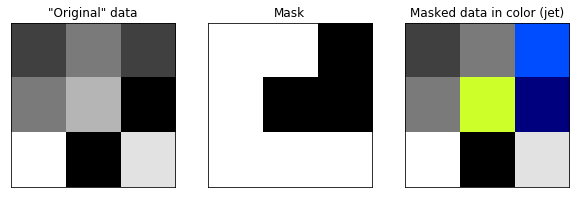

In [83]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
im = np.array([[2, 3, 2], [3, 4, 1], [6, 1, 5]])
mask = np.array([[False, False, True], [False, True, True], [False, False, False]])

# note that the mask is inverted (~) to show color where mask equals true
im_ma = np.ma.array(im, mask=~mask)

# some default keywords for imshow
kwargs = {'interpolation': 'none', 'vmin': im.min(), 'vmax': im.max()}

fig, ax = plt.subplots(1,3, figsize=(10,5), subplot_kw={'xticks': [], 'yticks': []})

ax[0].set_title('"Original" data')
ax[0].imshow(im, cmap=plt.cm.Greys_r, **kwargs)

ax[1].set_title('Mask')
ax[1].imshow(mask, cmap=plt.cm.binary, interpolation='none')

ax[2].set_title('Masked data in color (jet)')
ax[2].imshow(im, cmap=plt.cm.Greys_r, **kwargs)
ax[2].imshow(im_ma, cmap=plt.cm.jet, **kwargs)

In [116]:
import cv2
import glob
import numpy as np

X_data = []
files = glob.glob ("images/*.png")
for myFile in files:
    print(myFile)
    image = cv2.imread (myFile)
    X_data.append (image)

np.save('images/bigblob', image)

images/hicks-water3.png
images/numpxh.png
images/hicks-sqr4.png
images/mask.png
images/hicks-sqr.png
images/test-color.png
images/hicks3.png
images/newim.png
images/hicks-lev.png
images/hicks-mask3.png
images/hicks3a.png
images/test_out.png
images/hicks-sqr3.png
images/numpxhr2.png
images/mask-i.png
images/hicks-test3.png
images/hicks-water1.png
images/hicks-post.png
images/hicks-post3.png
images/numpxr2.png
images/face.png
images/face-i.png
images/NPimage.png
images/hicks-mask5.png
images/hicks-mask.png
images/hicks-post2.png
images/hicks-test2.png
images/hicks-wave.png
images/hicks-test.png
images/numpx2.png
images/my.png
images/face_HSV.png
images/hicks-water.png
images/hicks-post-water1.png
images/hicks-mask2.png
images/hicks-mask4.png


ValueError: cannot set an array element with a sequence

In [ ]:
# 'ndimage.convolve' function from scipy.  ndimage provides a "N" Dimensional convolution.
#If you want convolutions to work, both the image and the kernel must have the same number of dimensions.
#Kernel (4,4,7) cannot be convolved with and image (130,130). A singleton dimension must be added
#before convolution. Itmay be removed after words with squeeze.

img = np.zeros(shape=(130,130),dtype=np.float32)
img = img[:,:,None] # Add singleton dimension
res = convolve(img,kernel)
finalOutput = res.squeeze() # Remove singleton

In [211]:
import numpy as np
from scipy import ndimage
import cv2

im = cv2.imread('spies.jpg')
#im = np.ones((20, 20)) * np.arange(20)
#im = im[:,:,None] # Add singleton dimension
footprint = np.array([[-4,0,-1,0,-4],
                       [0,0,-1,0,0],
                       [-1,-1,32,-1,-1],
                       [0,0,-1,0,0],
                       [-4,0,-1,0,-4]])
footprint = footprint[:,:,None] # Add singleton dimension
def test(x):
    return (x*0.5).sum()

res = ndimage.generic_filter(im, test, footprint=footprint)
finalOutput = res.squeeze()
cv2.imwrite("footprint5a.png", res)
cv2.imwrite("footprint5.png", finalOutput)

True

In [213]:
import numpy as np
from scipy import ndimage
import cv2

im = cv2.imread('spies.jpg')
#im = np.ones((20, 20)) * np.arange(20)
#im = im[:,:,None] # Add singleton dimension
footprint = np.array([[0,1,0],[1,1,1],[0,1,0]])
footprint = footprint[:,:,None] # Add singleton dimension
def test(x):
    return (x*0.5).sum()

res = ndimage.generic_filter(im, test, footprint=footprint)
finalOutput = res.squeeze()
cv2.imwrite("footprint6a.png", res)
cv2.imwrite("footprint6.png", finalOutput)

True

In [214]:
!showme footprint6.png

In [220]:
import numpy as np
from scipy import ndimage
import cv2

img = cv2.imread('spies.jpg')
blue, green, red = cv2.split(img)
cv2.imshow('blue', blue)
cv2.imshow('green', green)
cv2.imshow('red', red)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
 
img = cv2.imread('circles.png', 1)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [ ]:
#in the image:
red equals 237, green equals 28, and blue equals 36
87 95 16

In [231]:
!python converter.py 87 95 16

Lower bound is : [77, 100, 100]

Upper bound is : [97, 255, 255]


In [ ]:
lower_range = np.array([169, 100, 100], dtype=np.uint8)
upper_range = np.array([189, 255, 255], dtype=np.uint8)

In [581]:
#lower_range = np.array([67, 90, 90], dtype=np.uint8)
#upper_range = np.array([107, 255, 255], dtype=np.uint8)
lower_range = np.array([90, 67, 90], dtype=np.uint8)
upper_range = np.array([255, 107, 255], dtype=np.uint8)
    

img = cv2.imread('footprint6.png', 1)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, lower_range, upper_range)

cv2.imshow('mask',mask)
cv2.imshow('image', img)

cv2.imwrite("mask_colora.png", mask)
cv2.imwrite("image_colora.png", img)



cv2.waitKey(0)
cv2.destroyAllWindows()

error: /feedstock_root/build_artefacts/opencv_1495334243082/work/opencv-3.2.0/modules/imgproc/src/color.cpp:9815: error: (-215) (scn == 3 || scn == 4) && (depth == CV_8U || depth == CV_32F) in function cvtColor


In [242]:
lower_range = np.array([100, 77, 100], dtype=np.uint8)
upper_range = np.array([255, 97, 255], dtype=np.uint8)
    

img = cv2.imread('spies.jpg', 1)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, lower_range, upper_range)

cv2.imshow('mask',mask)
cv2.imshow('image', img)
 
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
img = cv2.imread('sof.jpg') # load a dummy image
while(1):
    cv2.imshow('img',img)
    k = cv2.waitKey(33)
    if k==27:    # Esc key to stop
        break
    elif k==-1:  # normally -1 returned,so don't print it
        continue
    else:
        print k # else print its value

In [104]:
from datetime import datetime

filename = datetime.utcnow().strftime('%Y%m%d%H%M%S%f')[:-3]
print filename

20170723033753416


In [110]:
!python BW_Binary.py pylab-output.png

20170723034405025.png


In [111]:
!showme 20170723034405025.png

In [69]:
%%writefile BW_Binary.py
## use sys, cv2 and numpy packages
import sys, cv2
import numpy as np
two = sys.argv[1]
print two

Overwriting BW_Binary.py


In [112]:
!which python


/home/jack/anaconda2/bin/python


To run file below:<br /> 
<b><i>python BW_Binary.py  pylab-output.png</i></b><br />
it will convert an image to black and white with name and date as filename <br /> 
<b>EXAMPLE: ' 20170723034405025.png '</b>

In [114]:
%%writefile BW_Binary
#!/home/jack/anaconda2/bin/python
# To run file: python BW_Binary.py pylab-output.png
## use sys, cv2 and numpy packages
import sys, cv2
import numpy as np
from datetime import datetime
imageName = sys.argv[1]
#imageName = 'spies.jpg'
## main function
## read source image and get its shape
sourceImage = cv2.imread(imageName, -1) # -1 is used to read the image as is
imgRows, imgCols, imgChannels = np.shape(sourceImage)

## color to gray scale
grayImage = cv2.cvtColor(sourceImage, cv2.COLOR_RGB2GRAY) # cv2.COLOR_RGB2GRAY = 7
grayImgName = 'gray_' + imageName

## gray to binary: threshold = 100 (arbitrary); maxValue = 255; type = cv2.THRESH_BINARY
flag, binaryImage = cv2.threshold(grayImage, 100, 255, cv2.THRESH_BINARY) # cv2.THRESH_BINARY = 0
binaryImgName = 'binary_' + imageName
baseD = datetime.utcnow().strftime('%Y%m%d%H%M%S%f')[:-3]
filename = baseD+".png"
cv2.imwrite(filename, binaryImage)
print filename

Writing BW_Binary


In [115]:
%%writefile test.py

import sys, cv2
import numpy as np
words = str(sys.argv)
print words

Overwriting test.py


In [116]:
!python test.py binaryImgName.png

['test.py', 'binaryImgName.png']


In [12]:
!showme grayImgName.png

In [224]:
%%writefile converter.py
import sys
import numpy as np
import cv2
 
blue = sys.argv[1]
green = sys.argv[2]
red = sys.argv[3]  
 
color = np.uint8([[[blue, green, red]]])
hsv_color = cv2.cvtColor(color, cv2.COLOR_BGR2HSV)
 
hue = hsv_color[0][0][0]
 
print("Lower bound is :"),
print("[" + str(hue-10) + ", 100, 100]\n")
 
print("Upper bound is :"),
print("[" + str(hue + 10) + ", 255, 255]")

Writing converter.py


In [221]:
import numpy as np
from scipy import ndimage
import cv2

img = cv2.imread('spies.jpg')
red = img[:,:,2]
cv2.imshow('red', red)
cv2.waitKey(0)
cv2.destroyAllWindows()

from skimage import data

np.save('color_cyan.npy', footprint)    # .npy extension is added if not given
d = np.load('color_cyan.npy')
footprint == d


In [191]:
import numpy as np
from scipy import ndimage
import cv2

im = cv2.imread('spies.jpg')
#im = np.ones((20, 20)) * np.arange(20)
#im = im[:,:,None] # Add singleton dimension
footprint = np.array([[0,0,1,0],
                       [0,0,0,0],
                       [0,0,0,0],
                       [1,0,0,0]])
footprint = footprint[:,:,None] # Add singleton dimension
def test(x):
    return (x*0.5).sum()    
res = ndimage.generic_filter(im, test, isz, footprint=footprint)
cv2.imwrite("footprint2.png", res)

True

In [189]:
!showme footprint2.png

In [142]:
import numpy as np
import scipy
from scipy import ndimage

d = np.array([[0, 0, 0, 0],[0, 1, 6, 0],[0, 0, 0, 0]]) #this represents an image array [1, 6], surrounded by zeroes
d = d.astype(float)
m = np.array([[1, 1, 1, 1],[1, 0, 0, 1],[1, 1, 1, 1]]) #the ones in the mask have a meaning of 'invalid'
md = np.ma.masked_array(d, mask = m)

f = np.array([[0, 1, 0],[1, 1, 1],[0, 1, 0]]) #small footprint
f = f[:,:,None] # Add singleton dimension

def fnc(x):
    return (x*0.5).sum()   
im = cv2.imread('avg.png')

avg = scipy.ndimage.generic_filter(im, fnc, footprint = f, mode = 'constant', cval = 0.0)
avg1 = scipy.ndimage.generic_filter(avg, fnc, footprint = f, mode = 'constant', cval = 0.0)

kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(avg1,-1,kernel)


avg4 = scipy.ndimage.generic_filter(dst, fnc, footprint = f, mode = 'constant', cval = 0.0)
#finalOutput = avg.squeeze()
cv2.imwrite('avg4.png', avg4)

True

In [143]:
!showme avg2.png

In [123]:
!which python


/home/jack/anaconda2/bin/python


In [122]:
!showme Snowflake.png


In [1]:
import facemorpher
help(facemorpher)

Help on package facemorpher:

NAME
    facemorpher - Face Morpher module init code

FILE
    /home/jack/anaconda2/lib/python2.7/site-packages/facemorpher/__init__.py

PACKAGE CONTENTS
    aligner
    averager
    blender
    cvver
    locator
    morpher
    plotter
    videoer
    warper

FUNCTIONS
    averager(imgpaths, width=500, height=600, alpha=False, blur_edges=False, out_filename='result.png', plot=False)
    
    list_imgpaths(images_folder=None, src_image=None, dest_image=None)
    
    morpher(imgpaths, width=500, height=600, num_frames=20, fps=10, out_frames=None, out_video=None, alpha=False, plot=False)
        Create a morph sequence from multiple images in imgpaths
        
        :param imgpaths: array or generator of image paths

DATA
    __all__ = ['list_imgpaths', 'morpher', 'averager']




In [10]:
!ls

1280px-Angry_woman.jpg
20170723034405025.png
20170723035049104.png
aligner.py
aligner.pyc
apps
averager.py
A-very-good-dreams-with-guide-Image-stuff.ipynb
avg2.png
avg3.png
avg4.png
avg.png
bin
binaryImgName.png
blender.py
blender.pyc
blur.jpg
build
BW_Binary.py
bw.png
circles.png
CMakeLists.txt
color_cyan.npy
colors.npy
converter.py
cvver.py
cvver.pyc
data
edge_filter.npy
eye.png
face.png
filtered.png
footprint3.png
footprint4.png
footprint5a.png
footprint5.png
footprint6a.png
footprint6.png
footprint.png
Golum.jpg
grayImgName.png
i
image1.png
image2.png
image3.jpg
image_colora.png
image_color.png
imagefolder
img1new.png
__init__.py
junk
lines.jpg
locator.py
locator.pyc
lotsawhite.jpg
make_bw
mask_colora.png
mask_color.png
mask_in.png
morpher.py
my.png
NewNotebook.ipynb
Newspiderguide.png
Newspiderlgter.png
o-RECEP-TAYYIP-ERDOGAN-GOLLUM-SMEAGOL-LORD-OF-THE-facebook.jpg
output.png
plotter.py
plotter.pyc
post-cv2a.jpg
post-cv2.jpg
pylab-output.png
pylab-output.pngbinary.png
sharpen_filt

In [11]:
!showme face.png

In [ ]:
# Blurring with OpenCV

In [16]:
# AVERAGE Blur
import cv2
img0 = cv2.imread("face.png")
blurImg = cv2.blur(img0,(10,10)) #You can change the kernel size as you want
cv2.imshow('Average',blurImg)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [18]:
# GAUSSIAN Blur
import cv2
img0 = cv2.imread("face.png")
gausBlur = cv2.GaussianBlur(img0, (5,5),0) #you can change the kernel size
cv2.imshow('Gaussian', gausBlur)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [19]:
# MEDIAN Blur
import cv2
img0 = cv2.imread("face.png")

medBlur = cv2.medianBlur(img0,5)
cv2.imshow('Median', medBlur)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
# BILATERAL Blur
import cv2
img0 = cv2.imread("face.png")

bilFilter = cv2.bilateralFilter(img0,9,75,75)
cv2.imshow('Bilateral', bilFilter)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [44]:
import cv2                             
import numpy as np    

#reading the image
img = cv2.imread('face.png')                  #displaying the frames
 
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2.imshow('gray',gray)
blur = cv2.GaussianBlur(gray,(15,15),0)
cv2.imshow('blur',blur)
ret,thresh1 = cv2.threshold(blur,70,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

mask, contours, _2= cv2.findContours(thresh1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
cv2.imshow('mask',mask)
cv2.imshow('img',img)
cv2.imshow('thresh1',thresh1)
cv2.waitKey(0)
cv2.destroyAllWindows() 

In [54]:
import cv2                             
import numpy as np    

#reading the image
img = cv2.imread('face.png')                  #displaying the frames
 
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#cv2.imshow('gray',gray)
blur = cv2.GaussianBlur(gray,(15,15),0)
#cv2.imshow('blur',blur)
ret,thresh1 = cv2.threshold(blur,70,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

mask, contours, _2= cv2.findContours(thresh1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 

cv2.imshow('mask', mask)
cv2.waitKey(0)
cv2.destroyAllWindows() 

In [62]:
!wget -O woman.jpg https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Angry_woman.jpg/1280px-Angry_woman.jpg

--2017-07-23 18:50:50--  https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Angry_woman.jpg/1280px-Angry_woman.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 148207 (145K) [image/jpeg]
Saving to: ‘woman.jpg’

woman.jpg           100%[===================>] 144.73K   209KB/s    in 0.7s    

2017-07-23 18:50:52 (209 KB/s) - ‘woman.jpg’ saved [148207/148207]



In [12]:
!ls 

1280px-Angry_woman.jpg
20170723034405025.png
20170723035049104.png
aligner.py
aligner.pyc
apps
averager.py
A-very-good-dreams-with-guide-Image-stuff.ipynb
avg2.png
avg3.png
avg4.png
avg.png
bin
binaryImgName.png
blender.py
blender.pyc
blur.jpg
build
BW_Binary.py
bw.png
circles.png
CMakeLists.txt
color_cyan.npy
colors.npy
converter.py
cvver.py
cvver.pyc
data
detect.jpg
edge_filter.npy
eye.png
face_landmark_detection.py
face.png
filtered.png
footprint3.png
footprint4.png
footprint5a.png
footprint5.png
footprint6a.png
footprint6.png
footprint.png
Golum.jpg
grayImgName.png
i
image1.png
image2.png
image3.jpg
image_colora.png
image_color.png
imagefolder
img1new.png
__init__.py
junk
lines.jpg
locator.py
locator.pyc
lotsawhite.jpg
make_bw
mask_colora.png
mask_color.png
mask_in.png
morpher.py
my.png
NewNotebook.ipynb
Newspiderguide.png
Newspiderlgter.png
o-RECEP-TAYYIP-ERDOGAN-GOLLUM-SMEAGOL-LORD-OF-THE-facebook.jpg
output.png
plotter.py
plotter.pyc
post-cv2a.jpg
post-cv2.jpg
pylab-output.png
p

In [2]:
!wget -O detect.jpg https://i.stack.imgur.com/V6562.jpg

--2017-07-23 19:29:30--  https://i.stack.imgur.com/V6562.jpg
Resolving i.stack.imgur.com (i.stack.imgur.com)... 104.16.111.18, 104.16.112.18, 104.16.110.18, ...
Connecting to i.stack.imgur.com (i.stack.imgur.com)|104.16.111.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 140168 (137K) [image/jpeg]
Saving to: ‘detect.jpg’

detect.jpg          100%[===================>] 136.88K   143KB/s    in 1.0s    

2017-07-23 19:29:32 (143 KB/s) - ‘detect.jpg’ saved [140168/140168]



In [13]:
!python face_landmark_detection.py data/shape_predictor_68_face_landmarks.dat imagefolder\n

Illegal instruction


In [8]:
%%writefile face_landmark_detection.py
#!/usr/bin/python
# The contents of this file are in the public domain. See LICENSE_FOR_EXAMPLE_PROGRAMS.txt
#
#   This example program shows how to find frontal human faces in an image and
#   estimate their pose.  The pose takes the form of 68 landmarks.  These are
#   points on the face such as the corners of the mouth, along the eyebrows, on
#   the eyes, and so forth.
#
#   This face detector is made using the classic Histogram of Oriented
#   Gradients (HOG) feature combined with a linear classifier, an image pyramid,
#   and sliding window detection scheme.  The pose estimator was created by
#   using dlib's implementation of the paper:
#      One Millisecond Face Alignment with an Ensemble of Regression Trees by
#      Vahid Kazemi and Josephine Sullivan, CVPR 2014
#   and was trained on the iBUG 300-W face landmark dataset.
#
#   Also, note that you can train your own models using dlib's machine learning
#   tools. See train_shape_predictor.py to see an example.
#
#   You can get the shape_predictor_68_face_landmarks.dat file from:
#   http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
#
# COMPILING/INSTALLING THE DLIB PYTHON INTERFACE
#   You can install dlib using the command:
#       pip install dlib
#
#   Alternatively, if you want to compile dlib yourself then go into the dlib
#   root folder and run:
#       python setup.py install
#   or
#       python setup.py install --yes USE_AVX_INSTRUCTIONS
#   if you have a CPU that supports AVX instructions, since this makes some
#   things run faster.  
#
#   Compiling dlib should work on any operating system so long as you have
#   CMake and boost-python installed.  On Ubuntu, this can be done easily by
#   running the command:
#       sudo apt-get install libboost-python-dev cmake
#
#   Also note that this example requires scikit-image which can be installed
#   via the command:
#       pip install scikit-image
#   Or downloaded from http://scikit-image.org/download.html. 

import sys
import os
import dlib
import glob
from skimage import io
import cv2
if len(sys.argv) != 3:
    print(
        "Give the path to the trained shape predictor model as the first "
        "argument and then the directory containing the facial images.\n"
        "For example, if you are in the python_examples folder then "
        "execute this program by running:\n"
        "    ./face_landmark_detection.py shape_predictor_68_face_landmarks.dat ../examples/faces\n"
        "You can download a trained facial shape predictor from:\n"
        "    http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2")
    exit()

predictor_path = sys.argv[1]
faces_folder_path = sys.argv[2]

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_path)
win = dlib.image_window()

for f in glob.glob(os.path.join(faces_folder_path, "*.jpg")):
    print("Processing file: {}".format(f))
    img = io.imread(f)

    win.clear_overlay()
    win.set_image(img)

    # Ask the detector to find the bounding boxes of each face. The 1 in the
    # second argument indicates that we should upsample the image 1 time. This
    # will make everything bigger and allow us to detect more faces.
    dets = detector(img, 1)
    print("Number of faces detected: {}".format(len(dets)))
    for k, d in enumerate(dets):
        print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
            k, d.left(), d.top(), d.right(), d.bottom()))
        # Get the landmarks/parts for the face in box d.
        shape = predictor(img, d)
        print("Part 0: {}, Part 1: {} ...".format(shape.part(0),
                                                  shape.part(1)))
        # Draw the face landmarks on the screen.
        
    cv2.imshow('mask', shape)
    cv2.waitKey(0)
    cv2.destroyAllWindows() 

Overwriting face_landmark_detection.py


In [24]:
import numpy as np
import blender
from matplotlib import pyplot as plt
import cv2
from PIL import Image
%matplotlib inline
img1 = cv2.imread("avg.png")

kernel = np.load('sharpen_filter.npy')
sharpen = cv2.filter2D(img1,-1,kernel)   


cv2.imshow('sharpen',sharpen)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [53]:
!wget -O lines.jpg http://gdj.graphicdesignjunction.com/wp-content/uploads/2010/06/vector-graphic/vector-graphic-design-12.jpg

--2017-07-22 15:44:40--  http://gdj.graphicdesignjunction.com/wp-content/uploads/2010/06/vector-graphic/vector-graphic-design-12.jpg
Resolving gdj.graphicdesignjunction.com (gdj.graphicdesignjunction.com)... 151.139.241.27
Connecting to gdj.graphicdesignjunction.com (gdj.graphicdesignjunction.com)|151.139.241.27|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 131088 (128K) [image/jpeg]
Saving to: ‘lines.jpg’

lines.jpg           100%[===================>] 128.02K   176KB/s    in 0.7s    

2017-07-22 15:44:41 (176 KB/s) - ‘lines.jpg’ saved [131088/131088]



In [73]:
kernel = np.array([ [0,0,0,0,0],
                    [0,0,-.5,0,0],
                    [0,-.5,3,-.5,0],
                    [0,0,-.5,0,0],
                    [0,0,0,0,0] ],np.float32)

np.save('sharpen_filter.npy', kernel)    # .npy extension is added if not given
d = np.load('sharpen_filter.npy')
kernel == d


array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]], dtype=bool)

In [57]:
kernel = np.array([ [-1,0,2,0,-1],
                    [-1,0,2,0,-1],
                    [-1,0,2,0,-1],
                    [-1,0,2,0,-1],
                    [-1,0,2,0,-1] ],np.float32)

np.save('numpy-filters/edge_filter.npy', kernel)    # .npy extension is added if not given
d = np.load('numpy-filters/edge_filter.npy')
kernel == d


array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]], dtype=bool)

In [65]:
!wget -O spies.jpg https://i1.wp.com/theheavensdeclare.net/wp-content/uploads/2012/08/Tissot_The_Harlot_of_Jericho_and_the_Two_Spies-in-Wikipedia-public-domain.jpg?ssl=1

--2017-07-22 16:10:49--  https://i1.wp.com/theheavensdeclare.net/wp-content/uploads/2012/08/Tissot_The_Harlot_of_Jericho_and_the_Two_Spies-in-Wikipedia-public-domain.jpg?ssl=1
Resolving i1.wp.com (i1.wp.com)... 192.0.77.2
Connecting to i1.wp.com (i1.wp.com)|192.0.77.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74733 (73K) [image/jpeg]
Saving to: ‘spies.jpg’

spies.jpg           100%[===================>]  72.98K   245KB/s    in 0.3s    

2017-07-22 16:10:50 (245 KB/s) - ‘spies.jpg’ saved [74733/74733]



import cv2
help(cv2)

In [ ]:
fillConvexPoly(...)
        fillConvexPoly(img, points, color[, lineType[, shift]]) -> img
    
    fillPoly(...)
        fillPoly(img, pts, color[, lineType[, shift[, offset]]]) -> img
    
    filter2D(...)
        filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]]) -> dst
    
    filterSpeckles(...)
        filterSpeckles(img, newVal, maxSpeckleSize, maxDiff[, buf]) -> img, buf
    
    findChessboardCorners(...)
        findChessboardCorners(image, patternSize[, corners[, flags]]) -> retval, corners
    
    findCirclesGrid(...)
        findCirclesGrid(image, patternSize[, centers[, flags[, blobDetector]]]) -> retval, centers
    
    findContours(...)
        findContours(image, mode, method[, contours[, hierarchy[, offset]]]) -> image, contours, hierarchy

In [69]:
import cv2
import numpy as np

#img = cv2.imread('lines.jpg')
img = cv2.imread('images/face_300.jpg')

kernel = np.load('numpy-filters/sharpen_filter.npy')

new_img = cv2.filter2D(img,-1,kernel)       # ddepth = -1, means destination image has depth same as input image.
cv2.imshow('img',img)
cv2.imshow('new',new_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [66]:
import cv2
import numpy as np

img = cv2.imread('images/face_300.jpg')

kernel = np.array([[1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1],
                   [1, 1, -23, 1, 1],
                   [1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1]],np.float32)

# kernel should be floating point type.

new_img = cv2.filter2D(img,-1,kernel)       # ddepth = -1, means destination image has depth same as input image.
#cv2.imshow('img',img)
cv2.imshow('new',new_img)
cv2.imwrite("lotsawhite.jpg", new_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [64]:
import cv2
import numpy as np

img = cv2.imread('images/face_gray.jpg')

kernel = np.array([ [-1,-.5,2,-.5,-1],
                    [-1,-.5,3,-.5,-1],
                    [-1,-.5,5,-.5,-1],
                    [-1,-.5,3,-.5,-1],
                    [-1,-.5,2,-.5,-1] ],np.float32)  # kernel should be floating point type.

new_img = cv2.filter2D(img,-1,kernel)       # ddepth = -1, means destination image has depth same as input image.
#cv2.imshow('img',img)
cv2.imshow('new',new_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [110]:
import cv2
import numpy as np

#img = cv2.imread('spies.jpg')
#img = cv2.imread('spies.jpg', 0)
img = cv2.imread('image1.png', 0)

kernel = np.array([ [-1,.5,.5,.5,-1],
                    [-1,.5,2,.5,-1],
                    [-1,.5,2,.5,-1],
                    [-1,.5,2,.5,-1],
                    [-1,.5,.5,.5,-1] ],np.float32)  # kernel should be floating point type.

new_img = cv2.filter2D(img,-1,kernel)       # ddepth = -1, means destination image has depth same as input image.
#cv2.imshow('img',img)
#ret,thresh1 = cv2.threshold(new_img,127,255,cv2.THRESH_BINARY)
ret,thresh1 = cv2.threshold(new_img,150,255,cv2.THRESH_BINARY)
cv2.imshow('new_img',new_img)
cv2.imshow('thresh1',thresh1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [107]:
https://docs.gimp.org/en/plug-in-convmatrix.html

SyntaxError: invalid syntax (<ipython-input-107-2a01d3bd4037>, line 1)

In [42]:
import cv2
import numpy as np

img = cv2.imread('image1.png')

kernel = np.array([ [0,-1,0],
                    [-1,5,-1],
                    [0,-1,0] ],np.float32)  # kernel should be floating point type.

new_img = cv2.filter2D(img,-1,kernel)       # ddepth = -1, means destination image has depth same as input image.
cv2.imshow('img',img)
cv2.imshow('new',new_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
from matplotlib import pyplot as plt
import cv2
from PIL import Image
def sharpen(imgin):
    img = cv2.imread(imgin)
    blured = cv2.GaussianBlur(img, (0, 0), 2.5)
    return cv2.addWeighted(img, 1.4, blured, -0.4, 0)

In [33]:
newim = sharpen("image1.png")
cv2.imwrite("img1new.png", newim)

cv2.imshow('newim', newim)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [30]:
!showme image1.png

In [31]:
!showme img1new.png

In [ ]:
# %load /home/jack/anaconda2/lib/python2.7/site-packages/facemorpher/averager.py
"""
::

  Face averager

  Usage:
    averager.py --images=<images_folder> [--blur] [--alpha] [--plot]
              [--width=<width>] [--height=<height>] [--out=<filename>]

  Options:
    -h, --help         Show this screen.
    --images=<folder>  Folder to images (.jpg, .jpeg, .png)
    --blur             Flag to blur edges of image [default: False]
    --alpha            Flag to save with transparent background [default: False]
    --width=<width>    Custom width of the images/video [default: 500]
    --height=<height>  Custom height of the images/video [default: 600]
    --out=<filename>   Filename to save the average face [default: result.png]
    --plot             Flag to display the average face [default: False]
    --version          Show version.
"""

from docopt import docopt
from builtins import range
import os
import cv2
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import locator
import aligner
import warper
import blender

def list_imgpaths(imgfolder):
  for fname in os.listdir(imgfolder):
    if (fname.lower().endswith('.jpg') or
       fname.lower().endswith('.png') or
       fname.lower().endswith('.jpeg')):
      yield os.path.join(imgfolder, fname)

def sharpen(img):
  blured = cv2.GaussianBlur(img, (0, 0), 2.5)
  return cv2.addWeighted(img, 1.4, blured, -0.4, 0)

def load_image_points(path, size):
  img = scipy.ndimage.imread(path)[..., :3]
  points = locator.face_points(path)

  if len(points) == 0:
    return None, None
  else:
    return aligner.resize_align(img, points, size)

def averager(imgpaths, width=500, height=600, alpha=False,
             blur_edges=False, out_filename='result.png', plot=False):

  size = (height, width)

  images = []
  point_set = []
  for path in imgpaths:
    img, points = load_image_points(path, size)
    if img is not None:
      images.append(img)
      point_set.append(points)

  if len(images) == 0:
    raise FileNotFoundError('Could not find any valid images.' +
                            ' Supported formats are .jpg, .png, .jpeg')

  ave_points = locator.average_points(point_set)
  num_images = len(images)
  result_images = np.zeros(images[0].shape, np.float32)
  for i in range(num_images):
    result_images += warper.warp_image(images[i], point_set[i],
                                       ave_points, size, np.float32)

  result_image = np.uint8(result_images / num_images)

  mask = blender.mask_from_points(size, ave_points)
  if blur_edges:
    blur_radius = 10
    mask = cv2.blur(mask, (blur_radius, blur_radius))
  if alpha:
    result_image = np.dstack((result_image, mask))
  mpimg.imsave(out_filename, result_image)

  if plot:
    plt.axis('off')
    plt.imshow(result_image)
    plt.show()


if __name__ == "__main__":
  args = docopt(__doc__, version='Face Averager 1.0')
  try:
    averager(list_imgpaths(args['--images']), int(args['--width']),
             int(args['--height']), args['--alpha'], args['--blur'],
             args['--out'], args['--plot'])
  except Exception as e:
    print(e)


In [14]:
import facemorpher
help(facemorpher)
#help(facemorpher)

#facemorpher.averager("imagefolder/")
facemorpher.averager("/home/jack/Desktop/face_morpher/facemorpher/imagefolder", width=500, height=600, alpha=False, blur_edges=False, out_filename='result.png', plot=False)
    

Help on package facemorpher:

NAME
    facemorpher - Face Morpher module init code

FILE
    /home/jack/anaconda2/lib/python2.7/site-packages/facemorpher/__init__.py

PACKAGE CONTENTS
    aligner
    averager
    blender
    cvver
    locator
    morpher
    plotter
    videoer
    warper

FUNCTIONS
    averager(imgpaths, width=500, height=600, alpha=False, blur_edges=False, out_filename='result.png', plot=False)
    
    list_imgpaths(images_folder=None, src_image=None, dest_image=None)
    
    morpher(imgpaths, width=500, height=600, num_frames=20, fps=10, out_frames=None, out_video=None, alpha=False, plot=False)
        Create a morph sequence from multiple images in imgpaths
        
        :param imgpaths: array or generator of image paths

DATA
    __all__ = ['list_imgpaths', 'morpher', 'averager']




IOError: [Errno 21] Is a directory: '/'

In [86]:
import blender
help(blender.poisson_blend)

Help on function poisson_blend in module blender:

poisson_blend(img_source, dest_img, img_mask, offset=(0, 0))



In [87]:
import blender
help(blender)

Help on module blender:

NAME
    blender

FILE
    /home/jack/Desktop/face_morpher/facemorpher/blender.py

FUNCTIONS
    alpha_feathering(src_img, dest_img, img_mask, blur_radius=15)
    
    apply_mask(img, mask)
        Apply mask to supplied image
        :param img: max 3 channel image
        :param mask: [0-255] values in mask
        :returns: new image with mask applied
    
    mask_from_points(size, points)
    
    poisson_blend(img_source, dest_img, img_mask, offset=(0, 0))
    
    weighted_average(img1, img2, percent=0.5)




In [76]:
!ls

1280px-Angry_woman.jpg	CMakeLists.txt	junk		   showme.cpp
aligner.py		cvver.py	locator.py	   stasm
aligner.pyc		cvver.pyc	locator.pyc	   STASMConfig.cmake.in
apps			data		mask_in.png	   stasm_util.cpp
averager.py		face.png	morpher.py	   videoer.py
bin			image1.png	NewNotebook.ipynb  videoer.pyc
blender.py		image2.png	plotter.py	   warper.py
blender.pyc		imagefolder	plotter.pyc	   warper.pyc
build			__init__.py	showme


In [81]:
import blender
from matplotlib import pyplot as plt
import cv2
from PIL import Image
%matplotlib inline
img1 = cv2.imread("image1.png")
img2 = cv2.imread("image2.png")
img_mask = cv2.imread("face.png")
plt.figure(figsize=(20,10))
#result2 = blender.weighted_average(img1, img2, percent=0.8)
#result2 = blender.poisson_blend(img1, img2, img_mask, offset=(10, 10))
result2 = blender.apply_mask(img1, img2)
plt.imshow(result2)

cv2.imwrite("junk.png,", result2)

ValueError: operands could not be broadcast together with shapes (740,650) (740,650,3) 

60.0 10118.0 float32


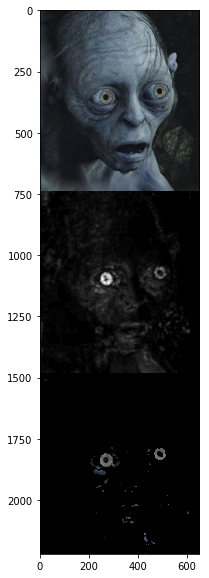

In [191]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
  
#roi is the object or region of object we need to find
roi = cv2.imread('eye.png')
hsv = cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)
  
#target is the image we search in
target = cv2.imread('image1.png')
hsvt = cv2.cvtColor(target,cv2.COLOR_BGR2HSV)
  
M = cv2.calcHist([hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )
I = cv2.calcHist([hsvt],[0, 1], None, [180, 256], [0, 180, 0, 256] )
  
R = M/(I+1)
print M.max(),I.max(),R.dtype
#cv2.normalize(prob,prob,0,255,cv2.NORM_MINMAX,0)
  
h,s,v = cv2.split(hsvt)
B = R[h.ravel(),s.ravel()]
B = np.minimum(B,1)
B = B.reshape(hsvt.shape[:2])
  
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))
cv2.filter2D(B,-1,disc,B)
B = np.uint8(B)
cv2.normalize(B,B,0,255,cv2.NORM_MINMAX)
ret,thresh = cv2.threshold(B,50,255,0)
res = cv2.bitwise_and(target,target,mask = thresh)
cv2.imshow('nice',res)
cv2.imshow('img',target)
res = np.vstack((target,cv2.merge((B,B,B)),res))
cv2.imwrite('thresh.png',thresh)
cv2.imwrite('output.png',res)
plt.figure(figsize=(20,10))  
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(res)
##plt.show()
  


In [186]:
!showme output.png

In [85]:
cv2.getStructuringElement(cv2.THRESH_BINARY,(5,5))

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [107]:
cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

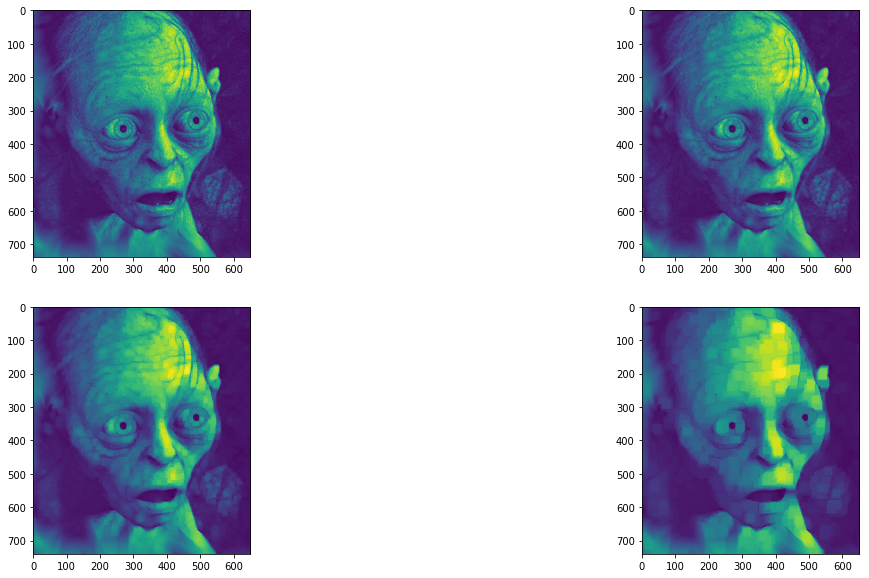

In [108]:
from matplotlib import pyplot as plt
import cv2
from PIL import Image
%matplotlib inline
import numpy as np
plt.figure(figsize=(20,10))
img = cv2.imread('image1.png',0)
#kernel = np.ones((5,5),np.uint8)
kernel1 = np.ones((2,2),np.uint8)
opening1b = cv2.morphologyEx(img, cv2.MORPH_ELLIPSE, kernel1)

kernel2 = np.ones((4,4),np.uint8)
opening2b = cv2.morphologyEx(img, cv2.MORPH_ELLIPSE, kernel2)

kernel3 = np.ones((10,10),np.uint8)
opening3b = cv2.morphologyEx(img, cv2.MORPH_ELLIPSE, kernel3)

kernel4 = np.ones((20,20),np.uint8)
opening4b = cv2.morphologyEx(img, cv2.MORPH_ELLIPSE, kernel4)




plt.subplot(2, 2, 1)
plt.imshow(opening1b)
plt.subplot(2, 2, 2)
plt.imshow(opening2b)
plt.subplot(2, 2, 3)
plt.imshow(opening3b)
plt.subplot(2, 2, 4)
plt.imshow(opening4b)
plt.show()


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('gradient.png',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in xrange(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

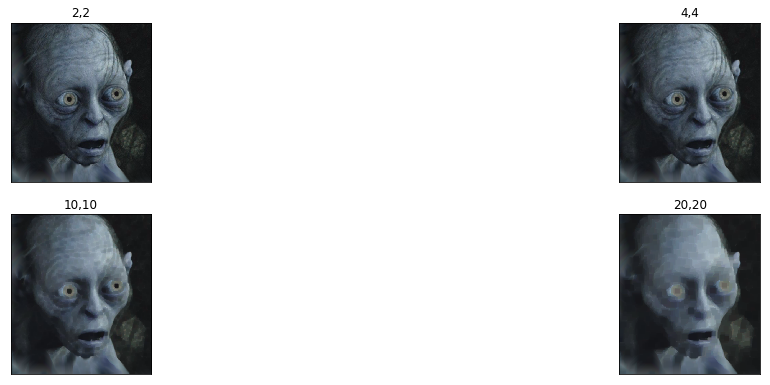

In [112]:
from matplotlib import pyplot as plt
import cv2
from PIL import Image
%matplotlib inline
import numpy as np
plt.figure(figsize=(20,10))
#img = cv2.imread('image1.png',0)
img = cv2.imread('image1.png')
#kernel = np.ones((5,5),np.uint8)
kernel1 = np.ones((2,2),np.uint8)
opening1a = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel1)

kernel2 = np.ones((4,4),np.uint8)
opening2a = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel2)

kernel3 = np.ones((10,10),np.uint8)
opening3a = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel3)

kernel4 = np.ones((20,20),np.uint8)
opening4a = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel4)

titles = ['2,2','4,4','10,10','20,20']
images = [opening1a, opening2a, opening3a, opening4a]

for i in xrange(4):
    plt.subplot(3,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


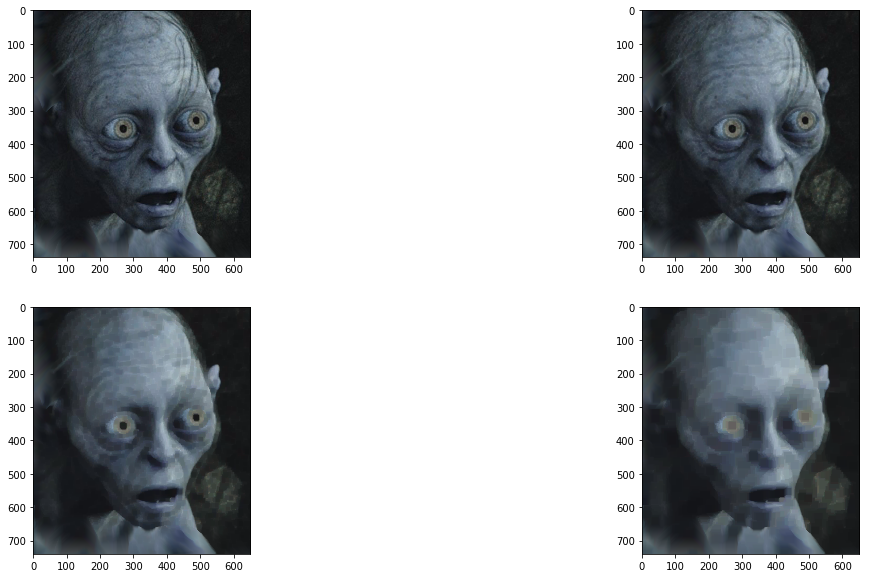

In [148]:
from matplotlib import pyplot as plt
import cv2
from PIL import Image
%matplotlib inline
import numpy as np
plt.figure(figsize=(20,10))
#img = cv2.imread('image1.png',0)
img = cv2.imread('image1.png')
#kernel = np.ones((5,5),np.uint8)
kernel1 = np.ones((2,2),np.uint8)
opening1a = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel1)

kernel2 = np.ones((4,4),np.uint8)
opening2a = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel2)

kernel3 = np.ones((10,10),np.uint8)
opening3a = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel3)

kernel4 = np.ones((20,20),np.uint8)
opening4a = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel4)

plt.subplot(2, 2, 1)
plt.imshow(opening1a)
plt.subplot(2, 2, 2)
plt.imshow(opening2a)
plt.subplot(2, 2, 3)
plt.imshow(opening3a)
plt.subplot(2, 2, 4)
plt.imshow(opening4a)
plt.show()


In [160]:
import cv2
import numpy as np

# Create a dummy input image.
canvas = np.zeros((640, 750), dtype=np.uint8)
canvas = cv2.circle(canvas, (640, 750), 20, (255,), -1)

kernel = np.array([[-1, -1, -1],
                   [-1, 4, -1],
                   [-1, -1, -1]])

dst = cv2.filter2D(canvas, -1, kernel)
cv2.imwrite("filtered.png", dst)

True

In [183]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
%matplotlib inline
# Create a dummy input image.
canvas = np.zeros((100, 100), dtype=np.uint8)
canvas = cv2.circle(canvas, (50, 50), 20, (255,), -1)


#kernel = np.array([[0, 0, 0],
#                   [0, 1, 0],
#                   [0, 0, 0]])

kernel = np.array([[-1.2, -1.2, -1.2],
                   [-1.2, 11, -1.2],
                   [-1.2, -1.2, -1.2]])


plt.figure(figsize=(20,10))

img = cv2.imread('image1.png')

dst = cv2.filter2D(img, -1, kernel)
cv2.imwrite("filtered.png", dst)
#plt.show(dst)

True

In [184]:
!showme filtered.png

^C


In [170]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import ndimage
import functools
%matplotlib inline
fp = np.array([[0, 1, 0],
               [1, 1, 1],
               [0, 1, 0]], np.uint8)

cv2.median_filter = functools.partial(scipy.ndimage.generic_filter,
                                  function=np.median,
                                  footprint=fp)

img = cv2.imread('image1.png')
#dst = cv2.filter2D(img, -1, kernel)
dst = cv2.filter2D(img, -1, kernel)
cv2.imwrite("filtered.png", dst)
#plt.show(dst)

True

In [167]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import ndimage
import functools
%matplotlib inline
fp = np.array([[0, 1, 0],
               [1, 1, 1],
               [0, 1, 0]], np.uint8)

median_filter = functools.partial(scipy.ndimage.generic_filter,
                                  function=np.median,
                                  footprint=fp)
print median_filter

In [149]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import ndimage
import functools
%matplotlib inline

fp = np.array([[0, 1, 0],
               [1, 1, 1],
               [0, 1, 0]], np.uint8)

median_filter = functools.partial(scipy.ndimage.generic_filter,
                                  function=np.median,
                                  footprint=fp)
plt.figure(figsize=(20,10))
#img = cv2.imread('image1.png',0)
img = cv2.imread('image1.png')
kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
plt.show(opening)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

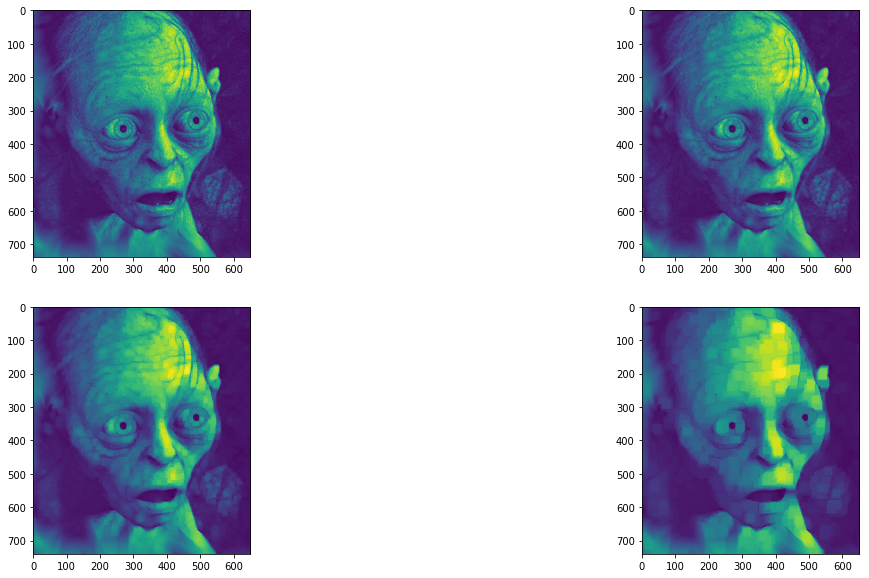

In [131]:
from matplotlib import pyplot as plt
import cv2
from PIL import Image
%matplotlib inline
import numpy as np
plt.figure(figsize=(20,10))
img = cv2.imread('image1.png',0)
#kernel = np.ones((5,5),np.uint8)
kernel1 = np.ones((2,2),np.uint8)
opening1 = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel1)

kernel2 = np.ones((4,4),np.uint8)
opening2 = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel2)

kernel3 = np.ones((10,10),np.uint8)
opening3 = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel3)

kernel4 = np.ones((20,20),np.uint8)
opening4 = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel4)




plt.subplot(2, 2, 1)
plt.imshow(opening1)
plt.subplot(2, 2, 2)
plt.imshow(opening2)
plt.subplot(2, 2, 3)
plt.imshow(opening3)
plt.subplot(2, 2, 4)
plt.imshow(opening4)
plt.show()


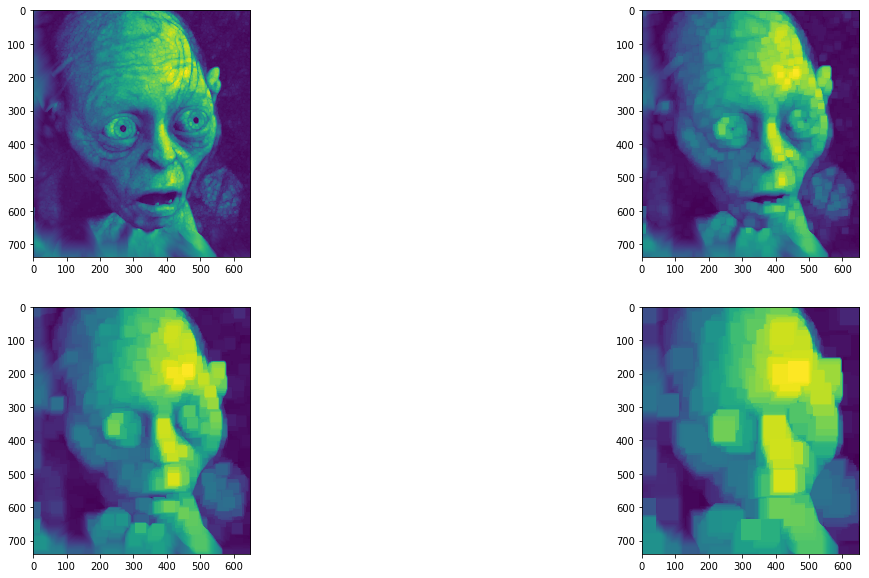

In [103]:
from matplotlib import pyplot as plt
import cv2
from PIL import Image
%matplotlib inline
import numpy as np
plt.figure(figsize=(20,10))
img = cv2.imread('image1.png',0)
#kernel = np.ones((8,8),np.uint8)
kernel = np.ones((4,4),np.uint8)
dilate1 = cv2.dilate(img,kernel,iterations = 1)
dilate2 = cv2.dilate(img,kernel,iterations = 5)
dilate3 = cv2.dilate(img,kernel,iterations = 10)
dilate4 = cv2.dilate(img,kernel,iterations = 20)


plt.subplot(2, 2, 1)
plt.imshow(dilate1)
plt.subplot(2, 2, 2)
plt.imshow(dilate2)
plt.subplot(2, 2, 3)
plt.imshow(dilate3)
plt.subplot(2, 2, 4)
plt.imshow(dilate4)
plt.show()


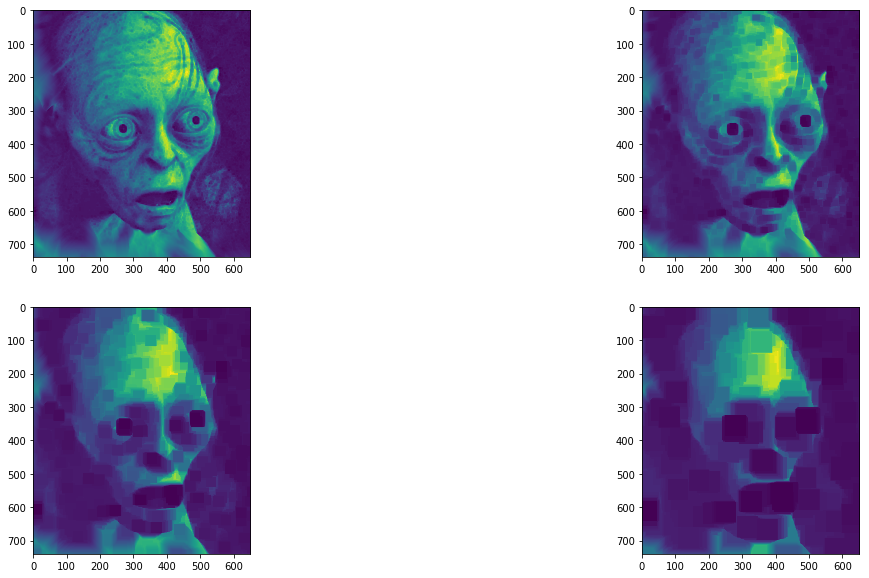

In [102]:
from matplotlib import pyplot as plt
import cv2
from PIL import Image
%matplotlib inline
import numpy as np
plt.figure(figsize=(20,10))
img = cv2.imread('image1.png',0)
#kernel = np.ones((8,8),np.uint8)
kernel = np.ones((4,4),np.uint8)
erosion1 = cv2.erode(img,kernel,iterations = 1)
erosion2 = cv2.erode(img,kernel,iterations = 5)
erosion3 = cv2.erode(img,kernel,iterations = 10)
erosion4 = cv2.erode(img,kernel,iterations = 20)


plt.subplot(2, 2, 1)
plt.imshow(erosion1)
plt.subplot(2, 2, 2)
plt.imshow(erosion2)
plt.subplot(2, 2, 3)
plt.imshow(erosion3)
plt.subplot(2, 2, 4)
plt.imshow(erosion4)
plt.show()


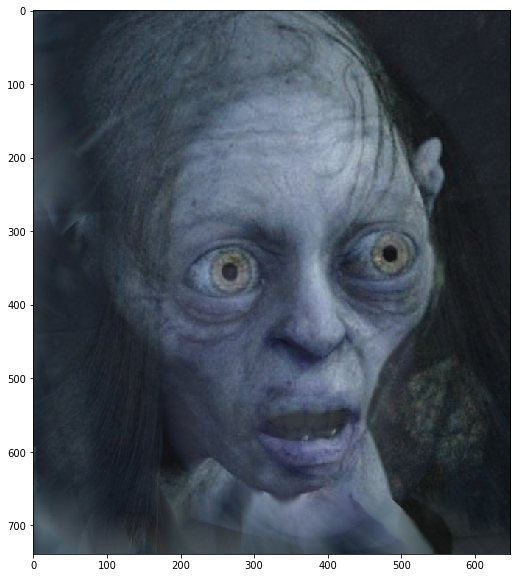

In [67]:
import blender
from matplotlib import pyplot as plt
import cv2
from PIL import Image
%matplotlib inline
img1 = cv2.imread("image1.png")
img2 = cv2.imread("image2.png")
img_mask = cv2.imread("mask_in.png")
plt.figure(figsize=(20,10))
result1 = blender.weighted_average(img1, img2, percent=0.8)
plt.imshow(result1)

In [201]:
import blender
from matplotlib import pyplot as plt
import cv2
from PIL import Image
img1 = cv2.imread("image2.png")
img2 = cv2.imread("image2.png")
img_mask = cv2.imread("image2.png")
#img_mask = cv2.imread("face.png")
plt.figure(figsize=(20,10))
result1 = blender.alpha_feathering(img1, img2, img_mask, blur_radius=5)
result2 = blender.alpha_feathering(img1, img2, img_mask, blur_radius=15)
result3 = blender.alpha_feathering(img1, img2, img_mask, blur_radius=25)
result4 = blender.alpha_feathering(img1, img2, img_mask, blur_radius=35)



ValueError: operands could not be broadcast together with shapes (740,650) (740,650,3) 

In [ ]:
plt.subplot(2, 2, 1)
plt.imshow(result1)
plt.subplot(2, 2, 2)
plt.imshow(result2)
plt.subplot(2, 2, 3)
plt.imshow(result3)
plt.subplot(2, 2, 4)
plt.imshow(result4)
plt.show()

In [ ]:
https://pythonprogramming.net/grabcut-foreground-extraction-python-opencv-tutorial/

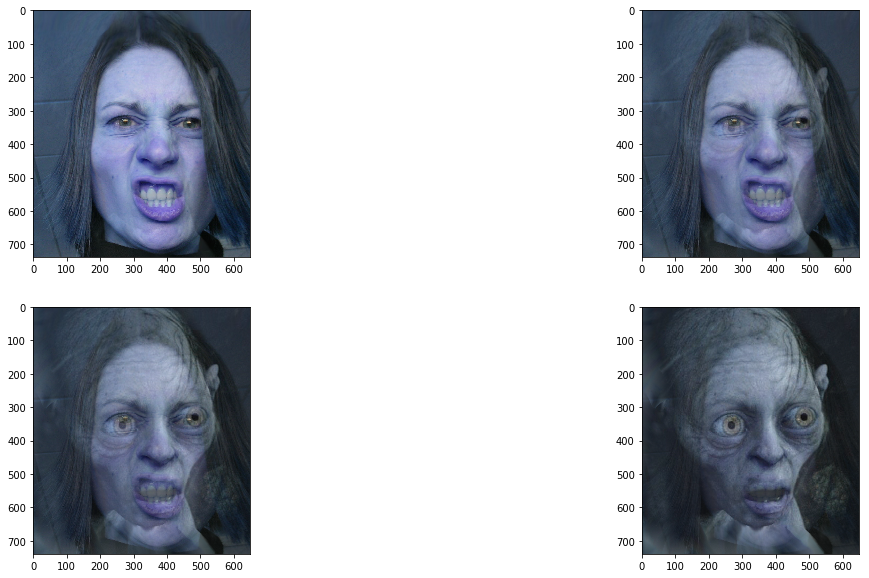

In [42]:
import blender
from matplotlib import pyplot as plt
import cv2
from PIL import Image
%matplotlib inline
img1 = cv2.imread("image1.png")
img2 = cv2.imread("image2.png")
plt.figure(figsize=(20,10))
result1 = blender.weighted_average(img1, img2, percent=0.2)
result2 = blender.weighted_average(img1, img2, percent=0.4)
result3 = blender.weighted_average(img1, img2, percent=0.6)
result4 = blender.weighted_average(img1, img2, percent=0.8)

plt.subplot(2, 2, 1)
plt.imshow(result1)
plt.subplot(2, 2, 2)
plt.imshow(result2)
plt.subplot(2, 2, 3)
plt.imshow(result3)
plt.subplot(2, 2, 4)
plt.imshow(result4)
plt.show()

In [120]:
import blender
import pylab
import cv2
from PIL import Image
%matplotlib inline
img1 = cv2.imread("image1.png")
img2 = cv2.imread("image2.png")
pylab.figure(figsize=(20,10))
result1 = blender.weighted_average(img1, img2, percent=0.2)
result2 = blender.weighted_average(img1, img2, percent=0.4)
result3 = blender.weighted_average(img1, img2, percent=0.6)
result4 = blender.weighted_average(img1, img2, percent=0.8)

pylab.subplot(2, 2, 1)
pylab.imshow(result1)
pylab.subplot(2, 2, 2)
pylab.imshow(result2)
pylab.subplot(2, 2, 3)
pylab.imshow(result3)
pylab.subplot(2, 2, 4)
pylab.imshow(result4)
pylab.show()

error: /feedstock_root/build_artefacts/opencv_1495334243082/work/opencv-3.2.0/modules/core/src/arithm.cpp:659: error: (-209) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function arithm_op


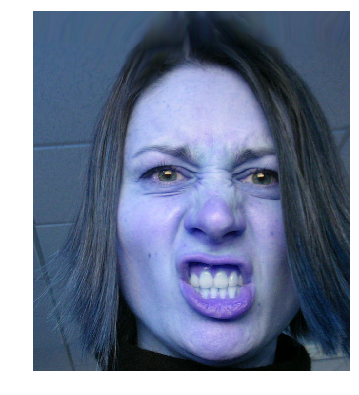

In [139]:
import blender
import pylab
import cv2
from matplotlib import pyplot as plt
from PIL import Image
img1 = cv2.imread("image1.png")
fig = pylab.figure(figsize=(20,10))
ax_size = [0,0,.5,.5]
fig.add_axes(ax_size)

pylab.imshow(img2, vmin=1, vmax=2, origin='upper')
pylab.axis('off')
## As you noted.
pylab.savefig('pylab-output.png',bbox_inches='tight', pad_inches=0)

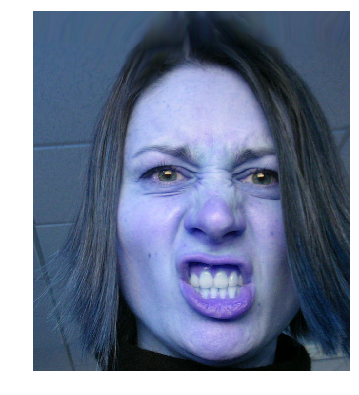

In [153]:
import blender
import pylab
import cv2
from matplotlib import pyplot as plt
from PIL import Image
img1 = cv2.imread("image1.png")
fig = pylab.figure(figsize=(20,10))

# The  ax_size controls the image size - not just the display size but 'image saved' size also
#ax_size = [0,0,1,1]
ax_size = [0,0,.5,.5]
fig.add_axes(ax_size)

# The origin='upper' can be changed to origin='lower' to flip the images upside down
pylab.imshow(img2, vmin=1, vmax=2, origin='upper')

# With pylab.axis('on') the image is shown with axis marks showing the original image's size in pixels 
pylab.axis('off')
# The inches='tight' removes the large border common to plot images
# pad_inches=0 alsocontrols the image padding
pylab.savefig('pylab-output.png',bbox_inches='tight', pad_inches=0)

In [154]:
# Display the image created above
!showme pylab-output.png

In [192]:
!wget -o Golum.jpg http://media.boingboing.net/wp-content/uploads/2017/04/o-RECEP-TAYYIP-ERDOGAN-GOLLUM-SMEAGOL-LORD-OF-THE-facebook.jpg

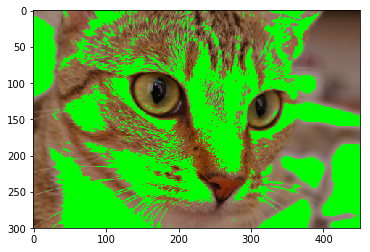

In [168]:
from skimage import data
cat = data.chelsea()
reddish = cat[:, :, 0] > 160
cat[reddish] = [0, 255, 0]
plt.imshow(cat)


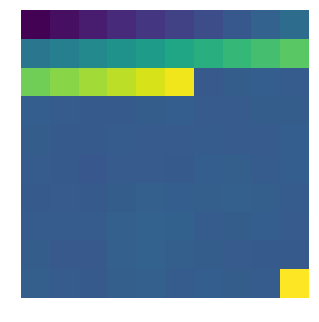

In [166]:
import pylab
colors = [[ 1., 10.,    20.,   30.,    40.,   50., 60.,   70.,   80.,    90. ],
[ 100. ,  110., 120.,   130.,   140., 150., 160., 170., 180., 190. ],
[ 200.,   210.,   220,  230. ,  240.,   250,  71.75, 75.25, 76.75, 74.  ],
[ 76.,   74.75, 72.5,  72.25 ,75.25, 76.5,  73.5,  73.,   75.25, 75.75],
[ 75.,   72.5,  72.25, 74.5,  73.25, 73.25, 74.5,  73.25, 73.5,  76.5 ],
[ 74.5,  72.,   69.5,  73.25,  73.75,  72.,    76.75,  77.,    74.25,  76.5 ],
[ 72.5,   73.75,  72.75,  75.75,  78.,    76.75,  77.75,  78.75,  77.25,  74.  ],
[ 74.5,   74.25,  74.75,  78.75,  80.75,  79.25,  74.5,   75.,    76.25,  73.  ],
[ 75.5,   71.5,   71.75,  78.75,  80.25,  77.5,   75.,    73.25,  72.25,  72.75],
[ 77.5,   74.5,   72.,    77.75,  78.25,  74.,    76.75,  75.75,  74.25,  256.  ]]

fig = pylab.figure(frameon=False)
ax_size = [0,0,1,1]
fig.add_axes(ax_size)
pylab.imshow(colors,vmin=0, vmax=256, origin='upper')
pylab.axis('off')
## As you noted.
pylab.savefig('output.png',bbox_inches='tight', pad_inches=0)

In [173]:
# As demonstated in the cells above this array may be saved to a *.npy file
colors = [[ 1., 10.,    20.,   30.,    40.,   50., 60.,   70.,   80.,    90. ],
[ 100. ,  110., 120.,   130.,   140., 150., 160., 170., 180., 190. ],
[ 200.,   210.,   220,  230. ,  240.,   250,  71.75, 75.25, 76.75, 74.  ],
[ 76.,   74.75, 72.5,  72.25 ,75.25, 76.5,  73.5,  73.,   75.25, 75.75],
[ 75.,   72.5,  72.25, 74.5,  73.25, 73.25, 74.5,  73.25, 73.5,  76.5 ],
[ 74.5,  72.,   69.5,  73.25,  73.75,  72.,    76.75,  77.,    74.25,  76.5 ],
[ 72.5,   73.75,  72.75,  75.75,  78.,    76.75,  77.75,  78.75,  77.25,  74.  ],
[ 74.5,   74.25,  74.75,  78.75,  80.75,  79.25,  74.5,   75.,    76.25,  73.  ],
[ 75.5,   71.5,   71.75,  78.75,  80.25,  77.5,   75.,    73.25,  72.25,  72.75],
[ 77.5,   74.5,   72.,    77.75,  78.25,  74.,    76.75,  75.75,  74.25,  256.  ]]

np.save('colors.npy', colors)    # .npy extension is added if not given
#Load and verify array
d = np.load('colors.npy')
colors == d


array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]], dtype=bool)

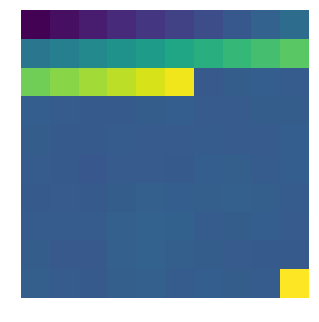

In [172]:
import matplotlib.pyplot as plt
%matplotlib inline
#loading and using the npy file created above
colors = np.load('colors.npy')
fig = plt.figure(frameon=False)
ax_size = [0,0,1,1]
fig.add_axes(ax_size)
plt.imshow(colors,vmin=0, vmax=256, origin='upper')
plt.axis('off')
## As you noted.
plt.savefig('output.png',bbox_inches='tight', pad_inches=0)

In [171]:
from skimage import data
colors = [[ 1., 10.,    20.,   30.,    40.,   50., 60.,   70.,   80.,    90. ],
[ 100. ,  110., 120.,   130.,   140., 150., 160., 170., 180., 190. ],
[ 200.,   210.,   220,  230. ,  240.,   250,  71.75, 75.25, 76.75, 74.  ],
[ 76.,   74.75, 72.5,  72.25 ,75.25, 76.5,  73.5,  73.,   75.25, 75.75],
[ 75.,   72.5,  72.25, 74.5,  73.25, 73.25, 74.5,  73.25, 73.5,  76.5 ],
[ 74.5,  72.,   69.5,  73.25,  73.75,  72.,    76.75,  77.,    74.25,  76.5 ],
[ 72.5,   73.75,  72.75,  75.75,  78.,    76.75,  77.75,  78.75,  77.25,  74.  ],
[ 74.5,   74.25,  74.75,  78.75,  80.75,  79.25,  74.5,   75.,    76.25,  73.  ],
[ 75.5,   71.5,   71.75,  78.75,  80.25,  77.5,   75.,    73.25,  72.25,  72.75],
[ 77.5,   74.5,   72.,    77.75,  78.25,  74.,    76.75,  75.75,  74.25,  256.  ]]

#kernel = np.array([ [0,0,0,0,0],
#                    [0,0,-.5,0,0],
#                    [0,-.5,3,-.5,0],
#                    [0,0,-.5,0,0],
#                    [0,0,0,0,0] ],np.float32)

np.save('colors.npy', colors)    # .npy extension is added if not given
d = np.load('colors.npy')
colors == d


array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]], dtype=bool)

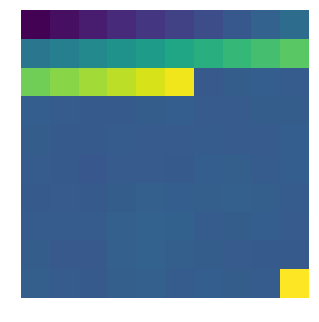

In [167]:
import matplotlib.pyplot as plt
%matplotlib inline
colors = [[ 1., 10.,    20.,   30.,    40.,   50., 60.,   70.,   80.,    90. ],
[ 100. ,  110., 120.,   130.,   140., 150., 160., 170., 180., 190. ],
[ 200.,   210.,   220,  230. ,  240.,   250,  71.75, 75.25, 76.75, 74.  ],
[ 76.,   74.75, 72.5,  72.25 ,75.25, 76.5,  73.5,  73.,   75.25, 75.75],
[ 75.,   72.5,  72.25, 74.5,  73.25, 73.25, 74.5,  73.25, 73.5,  76.5 ],
[ 74.5,  72.,   69.5,  73.25,  73.75,  72.,    76.75,  77.,    74.25,  76.5 ],
[ 72.5,   73.75,  72.75,  75.75,  78.,    76.75,  77.75,  78.75,  77.25,  74.  ],
[ 74.5,   74.25,  74.75,  78.75,  80.75,  79.25,  74.5,   75.,    76.25,  73.  ],
[ 75.5,   71.5,   71.75,  78.75,  80.25,  77.5,   75.,    73.25,  72.25,  72.75],
[ 77.5,   74.5,   72.,    77.75,  78.25,  74.,    76.75,  75.75,  74.25,  256.  ]]

fig = plt.figure(frameon=False)
ax_size = [0,0,1,1]
fig.add_axes(ax_size)
plt.imshow(colors,vmin=0, vmax=256, origin='upper')
plt.axis('off')
## As you noted.
plt.savefig('output.png',bbox_inches='tight', pad_inches=0)

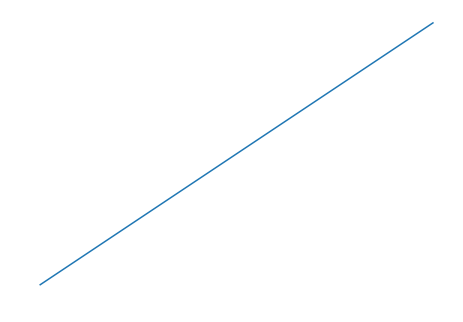

In [115]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(frameon=False)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')

ax.plot(range(10))

with open('image1.png', 'w') as outfile:
    fig.canvas.print_png(outfile)

In [124]:
%%writefile snowflake.py
#!/home/jack/anaconda2/bin/python
# Snowflake Simulation Using Reiter Cellular Automata
# Source: "A Local Cellular Model for Snow Crystal Growth" by Cliff Reiter
# FB36 - 20130107
import math
import random
from PIL import Image, ImageDraw
imgx = 500; imgy = 500 # image size
imgx1 = imgx - 1; imgy1 = imgy - 1
image = Image.new("RGB", (imgx, imgy))
draw = ImageDraw.Draw(image)
pixels = image.load()
maxIt = 1000 # of growth steps
# snowflake will differ depending on values of these parameters:
alpha = random.random() * 1.5 + 0.5
beta = random.random() * 0.3 + 0.3
gamma = random.random() * 0.01
mx = 250; my = 250 # width and height of 2DCA
ca = [[beta for x in range(mx)] for y in range(my)]
caRep = [[beta for x in range(mx)] for y in range(my)] # receptive cells
caNRep = [[beta for x in range(mx)] for y in range(my)] # non-receptive cells
dx = [-1, 0, -1, 1, 0, 1]; dy = [-1, -1, 0, 0, 1, 1] # 6 directions to grow
# these are for coloring the image
while True:
    mr0 = 2 ** random.randint(3, 6); mr1 = 256 / mr0
    mg0 = 2 ** random.randint(3, 6); mg1 = 256 / mg0
    mb0 = 2 ** random.randint(3, 6); mb1 = 256 / mb0
    if mr0 != mg0 and mr0 != mb0 and mg0 != mb0: break

ca[(my - 1) / 2][(mx - 1) / 2] = 1.0 # ice seed
for i in range(maxIt): # growth steps
    print "Growth Step: " + str(i + 1) + " of " + str(maxIt)
    # separate the array into receptive and non-receptive arrays
    for iy in range(my):
        for ix in range(mx):
            receptive = False
            if ca[iy][ix] >= 1.0: # ice
                receptive = True
            else: # check neighbors
                for j in range(6):
                    jx = ix + dx[j]; jy = iy + dy[j]
                    if jx >= 0 and jx < mx and jy >= 0 and jy < my:
                        if ca[jy][jx] >= 1.0: # ice
                            receptive = True
                            break
            if receptive:
                caRep[iy][ix] = ca[iy][ix] + gamma
                caNRep[iy][ix] = 0.0
            else:
                caRep[iy][ix] = 0.0
                caNRep[iy][ix] = ca[iy][ix]

    # new array: weighed averages of the non-receptive array + receptive array
    for iy in range(my):
        for ix in range(mx):
            wsum = caNRep[iy][ix] * (1.0 - alpha * 6.0 / 12.0)
            for j in range(6): # neighbors
                jx = ix + dx[j]; jy = iy + dy[j]
                if jx >= 0 and jx < mx and jy >= 0 and jy < my:
                    wsum += caNRep[jy][jx] * alpha / 12.0
            ca[iy][ix] = caRep[iy][ix] + wsum

# paint final state of the snowflake
an45 = - math.pi / 4.0
sn45 = math.sin(an45); cs45 = math.cos(an45)
scale = math.sqrt(3.0); ox = imgx1 / 2.0; oy = imgy1 / 2.0
for ky in range(imgy):
    for kx in range(imgx):
        # apply geometric transformation (scaling and rotation)
        tx = kx - ox; ty = (ky - oy) * scale
        tx0 = tx * cs45 - ty * sn45 + ox
        ty = tx * sn45 + ty * cs45 + oy; tx = tx0
        if tx >= 0 and tx <= imgx1 and ty >= 0 and ty <= imgy1:
            c = ca[int((my - 1) * ty / imgy1)][int((mx - 1) * tx / imgx1)]
            if c >= 1.0: # ice
                c = int((c - 1.0) * 255)
                pixels[kx, ky] = (c % mr0 * mr1, c % mg0 * mg1, c % mb0 * mb1)
label = "alpha = " + str(alpha) + " beta = " + str(beta) + " gamma = " + str(gamma)
draw.text((0, 0), label, (0, 255, 0)) # write to top-left using green color
image.save("Snowflake.png", "PNG")


Writing snowflake.py


In [ ]:
# References
https://progzoo.net/wiki/Python:Filtering_an_Array
http://www.scipy-lectures.org/packages/scikit-image/  
http://effbot.org/imagingbook/image.htm    
    
a = np.array([[1, 2, 0, 0],